## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [2]:
import numpy as np
import cv2
import glob
import pickle
import matplotlib.pyplot as plt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
# Dictionary to store mtx and dist parameter from all calibration.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.
dist_pickle = {} # # Save the camera calibration result for later use.

# Make a list of calibration images
images = glob.glob('../camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for index, fname in enumerate(images):
    img = cv2.imread(fname)
    img_size = (img.shape[1], img.shape[0])
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        
        # Do camera calibration given object points and image points
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
        
        dst = cv2.undistort(img, mtx, dist, None, mtx)
        cv2.imwrite('../camera_cal/undist' + str(index) + '.jpg',dst)
        
        # Save the camera calibration result for later use
        dist_pickle["mtx"] = mtx
        dist_pickle["dist"] = dist
        
        # Draw and display the corners
        #img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.imshow('img',img)
        cv2.imshow('dst',dst)
        cv2.waitKey(500)
        
    else:
        print("False is", fname)

cv2.destroyAllWindows()
pickle.dump( dist_pickle, open( "../camera_cal/dist_pickle.p", "wb" ) )

False is ../camera_cal\calibration1.jpg
False is ../camera_cal\calibration4.jpg
False is ../camera_cal\calibration5.jpg


PermissionError: [Errno 13] Permission denied: '../camera_cal/dist_pickle.p'

## And so on and so forth...

530.490114204 m 576.769476447 m


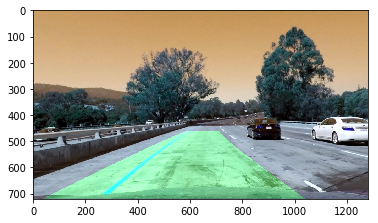

478.439786756 m 539.973964646 m


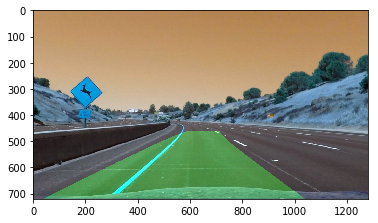

529.220788456 m 510.821602547 m


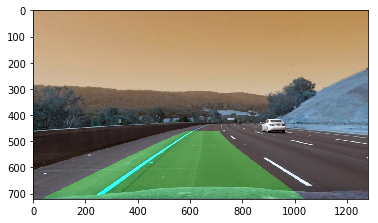

533.413227197 m 496.856128036 m


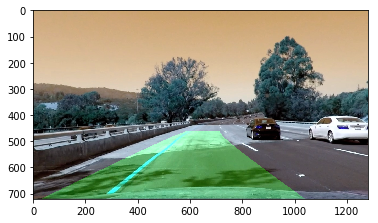

516.359711946 m 610.320272333 m


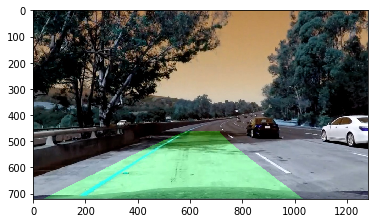

569.948768792 m 632.403855295 m


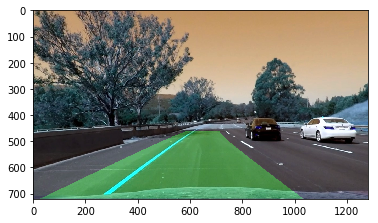

In [8]:
# Undistort driving images by the above result of camera calibration

pickle.load(open("../camera_cal/dist_pickle.p", "rb"))

# Difine the function for binalizing the images.
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0,255)):
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    #apply threshould
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return binary_output

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    #Calculate gradient magnitude
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    scale_factor = np.max(gradmag)/255
    gradmag = (gradmag/scal_factor).astype(np.uint8)
    binary_output = np.zeros_like(gradmag)
    #Apply threshould
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_tjresh[1])] = 1
    return binary_output

def color_threshould(image, sthresh=(0,255), vthresh=(0,255)):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= sthresh[0]) & (s_channel <= sthresh[1])] == 1
    
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    v_channel = hsv[:,:,2]
    v_binary = np.zeros_like(v_channel)
    v_binary[(v_channel >= vthresh[0]) & (v_channel <= vthresh[1])] == 1
    
    output = np.zeros_like(s_channel)
    output[(s_binary == 1) & (v_binary == 1)] == 1
    return output

#def window_mask(width, height, imag_ref, center, level):
#    output = np.zeros_like(img_ref)
#    output[int(img_ref.shape[0])]
#    return output

# Make a list of calibration images
images = glob.glob('../test_images/test*.jpg')

for index, fname in enumerate(images):
    img = cv2.imread(fname)
    img_size = (img.shape[1], img.shape[0])
    
    img = cv2.undistort(img, mtx, dist, None, mtx)
    
    # process image and generate binary pixel of interested
    preprocessImage = np.zeros_like(img[:,:,0])
    gradx = abs_sobel_thresh(img, orient='x', thresh=(12,255)) #12
    grady = abs_sobel_thresh(img, orient='y',  thresh=(25,255)) #25
    c_binary = color_threshould(img, sthresh=(100,255), vthresh=(50,255))
    preprocessImage[((gradx == 1) & (grady == 1) | (c_binary == 1))] = 255
    
    result = preprocessImage
    
    cv2.imwrite('../test_images/tracked' + str(index + 1) + '.jpg',result)
    
    src = np.float32(
    [[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
    [((img_size[0] / 6) - 10), img_size[1]],
    [(img_size[0] * 5 / 6) + 60, img_size[1]],
    [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])
    
    dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])
    
    #perform the transform
    M = cv2.getPerspectiveTransform(src, dst)

    Minv = cv2.getPerspectiveTransform(dst, src)

    #binary_warped = cv2.warpPerspective(preprocessImage, M, img_size, flags=cv2.INTER_LINEAR)
    binary_warped = cv2.warpPerspective(preprocessImage, M, img_size, flags=cv2.INTER_LINEAR)
    
    # Generate some fake data to represent lane-line pixels
    #ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
    # For each y position generate random x position within +/-50 pix
    # of the line base position in each case (x=200 for left, and x=900 for right)
    leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                              for y in ploty])
    rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                for y in ploty])

    leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
    rightx = rightx[::-1]  # Reverse to match top-to-bottom in y


    # Fit a second order polynomial to pixel positions in each fake lane line
    left_fit = np.polyfit(ploty, leftx, 2)
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fit = np.polyfit(ploty, rightx, 2)
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # Plot up the fake data
    mark_size = 3
    #plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
    #plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
    plt.xlim(0, 1280)
    plt.ylim(0, 720)
    #plt.plot(left_fitx, ploty, color='green', linewidth=3)
    #plt.plot(right_fitx, ploty, color='green', linewidth=3)
    plt.gca().invert_yaxis() # to visualize as we do the images
    
    # Define conversions in x and y from pixels space to meters
    y_eval = np.max(ploty)
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    print(left_curverad, 'm', right_curverad, 'm')
    # Example values: 632.1 m    626.2 m
    
    result = binary_warped
    
    cv2.imwrite('../test_images/transform' + str(index + 1) + '.jpg',result)
    
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (img.shape[1], img.shape[0])) 
    # Combine the result with the original image
    result_2 = cv2.addWeighted(img, 1, newwarp, 0.3, 0)
    plt.imshow(result_2)
    plt.show()

In [11]:
# Pipe line of preprocess and lane line detection
def pipeline(img):
    img = cv2.undistort(img, mtx, dist, None, mtx)
    
    # process image and generate binary pixel of interested
    preprocessImage = np.zeros_like(img[:,:,0])
    gradx = abs_sobel_thresh(img, orient='x', thresh=(12,255)) #12
    grady = abs_sobel_thresh(img, orient='y',  thresh=(25,255)) #25
    c_binary = color_threshould(img, sthresh=(100,255), vthresh=(50,255))
    preprocessImage[((gradx == 1) & (grady == 1) | (c_binary == 1))] = 255
    
    binary_warped = cv2.warpPerspective(preprocessImage, M, img_size, flags=cv2.INTER_LINEAR)
    
    # Generate some fake data to represent lane-line pixels
    ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
    quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
    # For each y position generate random x position within +/-50 pix
    # of the line base position in each case (x=200 for left, and x=900 for right)
    leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                              for y in ploty])
    rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                for y in ploty])

    leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
    rightx = rightx[::-1]  # Reverse to match top-to-bottom in y


    # Fit a second order polynomial to pixel positions in each fake lane line
    left_fit = np.polyfit(ploty, leftx, 2)
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fit = np.polyfit(ploty, rightx, 2)
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # Plot up the fake data
    mark_size = 3
    plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
    plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
    plt.xlim(0, 1280)
    plt.ylim(0, 720)
    plt.plot(left_fitx, ploty, color='green', linewidth=3)
    plt.plot(right_fitx, ploty, color='green', linewidth=3)
    plt.gca().invert_yaxis() # to visualize as we do the images
    
    # Define conversions in x and y from pixels space to meters
    y_eval = np.max(ploty)
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    print(left_curverad, 'm', right_curverad, 'm')
    # Example values: 632.1 m    626.2 m
    
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (img.shape[1], img.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(img, 1, newwarp, 0.3, 0)
    return result

In [12]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip

project_output = '../project_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
clip1 = VideoFileClip("../project_video.mp4")
project_clip = clip1.fl_image(pipeline) #NOTE: this function expects color images!!
%time project_clip.write_videofile(project_output, audio=False)

542.739005441 m 565.955653496 m
[MoviePy] >>>> Building video ../project_output.mp4
[MoviePy] Writing video ../project_output.mp4


  0%|                                                                                         | 0/1261 [00:00<?, ?it/s]

539.29057991 m 521.397926271 m


  0%|                                                                                 | 1/1261 [00:00<03:14,  6.49it/s]

511.187466778 m 550.884037958 m


  0%|▏                                                                                | 2/1261 [00:00<03:14,  6.48it/s]

595.745732913 m 617.476331973 m


  0%|▏                                                                                | 3/1261 [00:00<03:08,  6.67it/s]

650.537715923 m 521.76489215 m


  0%|▎                                                                                | 4/1261 [00:00<03:09,  6.62it/s]

524.570940787 m 553.779415825 m


  0%|▎                                                                                | 5/1261 [00:00<03:14,  6.45it/s]

552.372217121 m 504.959782714 m


  0%|▍                                                                                | 6/1261 [00:00<03:12,  6.52it/s]

509.721284012 m 514.408327187 m


  1%|▍                                                                                | 7/1261 [00:01<03:12,  6.53it/s]

536.608489483 m 642.294462069 m


  1%|▌                                                                                | 8/1261 [00:01<03:12,  6.52it/s]

545.289601174 m 630.425192751 m


  1%|▌                                                                                | 9/1261 [00:01<03:12,  6.50it/s]

538.105065317 m 618.985417819 m


  1%|▋                                                                               | 10/1261 [00:01<03:11,  6.53it/s]

497.555754179 m 465.991134845 m


  1%|▋                                                                               | 11/1261 [00:01<03:10,  6.58it/s]

482.053771223 m 566.284560265 m


  1%|▊                                                                               | 12/1261 [00:01<03:10,  6.54it/s]

416.860651475 m 497.538191018 m


  1%|▊                                                                               | 13/1261 [00:01<03:10,  6.56it/s]

531.458685209 m 586.606309637 m


  1%|▉                                                                               | 14/1261 [00:02<03:12,  6.47it/s]

585.611247205 m 567.967519583 m


  1%|▉                                                                               | 15/1261 [00:02<03:12,  6.49it/s]

536.221519751 m 526.611686049 m


  1%|█                                                                               | 16/1261 [00:02<03:07,  6.64it/s]

494.51198227 m 615.828725888 m


  1%|█                                                                               | 17/1261 [00:02<03:05,  6.71it/s]

577.575631199 m 525.309000668 m


  1%|█▏                                                                              | 18/1261 [00:02<03:04,  6.73it/s]

523.318259968 m 651.834865728 m


  2%|█▏                                                                              | 19/1261 [00:02<03:08,  6.60it/s]

565.60750229 m 535.157114948 m


  2%|█▎                                                                              | 20/1261 [00:03<03:10,  6.50it/s]

522.688617564 m 534.501821663 m


  2%|█▎                                                                              | 21/1261 [00:03<03:07,  6.60it/s]

509.830440203 m 529.90112093 m


  2%|█▍                                                                              | 22/1261 [00:03<03:01,  6.82it/s]

581.221403587 m 577.684760705 m


  2%|█▍                                                                              | 23/1261 [00:03<02:59,  6.88it/s]

553.878046476 m 478.186284717 m


  2%|█▌                                                                              | 24/1261 [00:03<02:59,  6.90it/s]

534.666744227 m 527.905108903 m


  2%|█▌                                                                              | 25/1261 [00:03<03:06,  6.65it/s]

502.166767756 m 576.729574057 m


  2%|█▋                                                                              | 26/1261 [00:03<03:10,  6.49it/s]

545.05855554 m 520.144282404 m


  2%|█▋                                                                              | 27/1261 [00:04<03:09,  6.52it/s]

502.415428876 m 574.43144404 m


  2%|█▊                                                                              | 28/1261 [00:04<03:08,  6.54it/s]

527.847043552 m 583.989012055 m


  2%|█▊                                                                              | 29/1261 [00:04<03:05,  6.63it/s]

572.730768191 m 516.352676874 m


  2%|█▉                                                                              | 30/1261 [00:04<03:03,  6.71it/s]

554.582251804 m 511.424285375 m


  2%|█▉                                                                              | 31/1261 [00:04<03:02,  6.75it/s]

541.898225753 m 534.677434768 m


  3%|██                                                                              | 32/1261 [00:04<03:06,  6.60it/s]

607.638764652 m 643.537288554 m


  3%|██                                                                              | 33/1261 [00:05<03:09,  6.47it/s]

547.030928282 m 543.926416573 m


  3%|██▏                                                                             | 34/1261 [00:05<03:05,  6.61it/s]

544.39001704 m 509.883680991 m


  3%|██▏                                                                             | 35/1261 [00:05<03:02,  6.71it/s]

587.102125408 m 493.980120987 m


  3%|██▎                                                                             | 36/1261 [00:05<02:57,  6.89it/s]

534.360136407 m 547.852235555 m


  3%|██▎                                                                             | 37/1261 [00:05<02:55,  6.99it/s]

482.554258443 m 645.418045009 m


  3%|██▍                                                                             | 38/1261 [00:05<02:53,  7.05it/s]

566.501709778 m 567.515650955 m


  3%|██▍                                                                             | 39/1261 [00:05<02:53,  7.06it/s]

539.770829526 m 554.09031352 m


  3%|██▌                                                                             | 40/1261 [00:05<02:52,  7.10it/s]

542.872171614 m 579.352042126 m


  3%|██▌                                                                             | 41/1261 [00:06<02:52,  7.05it/s]

524.480955536 m 485.767023307 m


  3%|██▋                                                                             | 42/1261 [00:06<02:50,  7.14it/s]

529.065199809 m 537.147377746 m


  3%|██▋                                                                             | 43/1261 [00:06<02:58,  6.83it/s]

546.921227261 m 558.355380639 m


  3%|██▊                                                                             | 44/1261 [00:06<02:56,  6.91it/s]

535.852912836 m 600.448568487 m


  4%|██▊                                                                             | 45/1261 [00:06<02:55,  6.95it/s]

540.971413195 m 494.050290695 m


  4%|██▉                                                                             | 46/1261 [00:06<02:51,  7.09it/s]

577.645677787 m 528.621505654 m


  4%|██▉                                                                             | 47/1261 [00:06<02:50,  7.11it/s]

580.638543225 m 590.316120115 m


  4%|███                                                                             | 48/1261 [00:07<02:52,  7.03it/s]

566.678995649 m 524.92681423 m


  4%|███                                                                             | 49/1261 [00:07<02:56,  6.86it/s]

639.367594046 m 631.316363481 m


  4%|███▏                                                                            | 50/1261 [00:07<02:57,  6.83it/s]

485.742797757 m 569.696717627 m


  4%|███▏                                                                            | 51/1261 [00:07<02:56,  6.85it/s]

505.576893582 m 553.227335136 m


  4%|███▎                                                                            | 52/1261 [00:07<02:55,  6.89it/s]

542.213879042 m 551.574190962 m


  4%|███▎                                                                            | 53/1261 [00:07<02:56,  6.84it/s]

556.962789079 m 595.040525102 m


  4%|███▍                                                                            | 54/1261 [00:08<02:55,  6.90it/s]

583.067083226 m 492.652602608 m


  4%|███▍                                                                            | 55/1261 [00:08<02:55,  6.88it/s]

513.154283947 m 546.454035579 m


  4%|███▌                                                                            | 56/1261 [00:08<02:59,  6.72it/s]

603.153061083 m 490.557600291 m


  5%|███▌                                                                            | 57/1261 [00:08<02:59,  6.71it/s]

576.448781939 m 582.314775072 m


  5%|███▋                                                                            | 58/1261 [00:08<03:26,  5.81it/s]

491.815551373 m 661.6819133 m


  5%|███▋                                                                            | 59/1261 [00:08<03:21,  5.98it/s]

593.167256547 m 525.669188811 m


  5%|███▊                                                                            | 60/1261 [00:08<03:13,  6.20it/s]

603.299808124 m 626.996152938 m


  5%|███▊                                                                            | 61/1261 [00:09<03:07,  6.41it/s]

555.525586279 m 589.019941784 m


  5%|███▉                                                                            | 62/1261 [00:09<03:03,  6.53it/s]

545.248492932 m 562.110858052 m


  5%|███▉                                                                            | 63/1261 [00:09<03:00,  6.63it/s]

614.544886898 m 509.40471638 m


  5%|████                                                                            | 64/1261 [00:09<03:00,  6.64it/s]

609.040731284 m 519.607349908 m


  5%|████                                                                            | 65/1261 [00:09<02:56,  6.77it/s]

599.711496477 m 571.338275495 m


  5%|████▏                                                                           | 66/1261 [00:09<03:00,  6.62it/s]

525.259185597 m 455.086459424 m


  5%|████▎                                                                           | 67/1261 [00:10<02:59,  6.66it/s]

507.391017527 m 478.170720825 m


  5%|████▎                                                                           | 68/1261 [00:10<02:55,  6.80it/s]

513.349329348 m 544.191664317 m


  5%|████▍                                                                           | 69/1261 [00:10<02:51,  6.94it/s]

562.756529614 m 469.211165267 m


  6%|████▍                                                                           | 70/1261 [00:10<02:51,  6.96it/s]

615.541049891 m 606.324009298 m


  6%|████▌                                                                           | 71/1261 [00:10<02:54,  6.84it/s]

613.757464245 m 589.525315718 m


  6%|████▌                                                                           | 72/1261 [00:10<02:54,  6.83it/s]

563.804992198 m 594.604132554 m


  6%|████▋                                                                           | 73/1261 [00:10<02:49,  7.00it/s]

751.872991187 m 557.740487009 m


  6%|████▋                                                                           | 74/1261 [00:11<02:50,  6.96it/s]

471.975332 m 531.208081873 m


  6%|████▊                                                                           | 75/1261 [00:11<02:50,  6.96it/s]

440.053368155 m 507.526276047 m


  6%|████▊                                                                           | 76/1261 [00:11<02:55,  6.77it/s]

570.103720535 m 540.246164313 m


  6%|████▉                                                                           | 77/1261 [00:11<02:54,  6.77it/s]

581.610432479 m 595.405249373 m


  6%|████▉                                                                           | 78/1261 [00:11<02:56,  6.70it/s]

547.933599606 m 521.970736995 m


  6%|█████                                                                           | 79/1261 [00:11<02:55,  6.75it/s]

592.391109903 m 595.171940568 m


  6%|█████                                                                           | 80/1261 [00:11<02:53,  6.83it/s]

515.075464651 m 517.55510466 m


  6%|█████▏                                                                          | 81/1261 [00:12<02:50,  6.93it/s]

568.857174723 m 562.450802263 m


  7%|█████▏                                                                          | 82/1261 [00:12<02:53,  6.80it/s]

602.659511267 m 510.562921433 m


  7%|█████▎                                                                          | 83/1261 [00:12<02:53,  6.81it/s]

468.079588267 m 638.039542847 m


  7%|█████▎                                                                          | 84/1261 [00:12<02:50,  6.89it/s]

576.015244224 m 445.620894995 m


  7%|█████▍                                                                          | 85/1261 [00:12<02:49,  6.94it/s]

547.796605647 m 490.900225855 m


  7%|█████▍                                                                          | 86/1261 [00:12<02:50,  6.89it/s]

585.410709119 m 524.759445445 m


  7%|█████▌                                                                          | 87/1261 [00:12<02:52,  6.80it/s]

487.912696344 m 586.721989654 m


  7%|█████▌                                                                          | 88/1261 [00:13<02:51,  6.86it/s]

565.960463411 m 530.830314696 m


  7%|█████▋                                                                          | 89/1261 [00:13<02:49,  6.92it/s]

492.378568378 m 558.748741559 m


  7%|█████▋                                                                          | 90/1261 [00:13<02:50,  6.86it/s]

540.337208068 m 576.155963299 m


  7%|█████▊                                                                          | 91/1261 [00:13<02:50,  6.88it/s]

647.237896037 m 533.541469782 m


  7%|█████▊                                                                          | 92/1261 [00:13<02:48,  6.95it/s]

501.635479306 m 589.023687498 m


  7%|█████▉                                                                          | 93/1261 [00:13<02:49,  6.88it/s]

593.70008502 m 600.469180431 m


  7%|█████▉                                                                          | 94/1261 [00:13<02:50,  6.86it/s]

609.645256095 m 509.077011016 m


  8%|██████                                                                          | 95/1261 [00:14<02:50,  6.84it/s]

581.870482719 m 562.833479613 m


  8%|██████                                                                          | 96/1261 [00:14<02:51,  6.80it/s]

637.681286336 m 467.468861321 m


  8%|██████▏                                                                         | 97/1261 [00:14<02:58,  6.54it/s]

575.127992099 m 526.43623392 m


  8%|██████▏                                                                         | 98/1261 [00:14<03:02,  6.38it/s]

544.731433001 m 472.459613193 m


  8%|██████▎                                                                         | 99/1261 [00:14<02:58,  6.52it/s]

580.502139367 m 605.351135059 m


  8%|██████▎                                                                        | 100/1261 [00:14<02:59,  6.47it/s]

474.251764306 m 497.655613518 m


  8%|██████▎                                                                        | 101/1261 [00:15<03:06,  6.21it/s]

642.058771311 m 563.041019308 m


  8%|██████▍                                                                        | 102/1261 [00:15<03:07,  6.19it/s]

573.340878298 m 551.9663525 m


  8%|██████▍                                                                        | 103/1261 [00:15<03:10,  6.09it/s]

572.550003598 m 476.95452888 m


  8%|██████▌                                                                        | 104/1261 [00:15<03:10,  6.07it/s]

597.836512126 m 617.789879336 m


  8%|██████▌                                                                        | 105/1261 [00:15<03:08,  6.15it/s]

533.543243588 m 704.906749813 m


  8%|██████▋                                                                        | 106/1261 [00:15<03:03,  6.29it/s]

489.973354052 m 678.342614579 m


  8%|██████▋                                                                        | 107/1261 [00:16<02:58,  6.45it/s]

493.409105951 m 474.775060113 m


  9%|██████▊                                                                        | 108/1261 [00:16<02:57,  6.48it/s]

499.841189632 m 518.490684068 m


  9%|██████▊                                                                        | 109/1261 [00:16<02:53,  6.63it/s]

630.163449484 m 521.278474964 m


  9%|██████▉                                                                        | 110/1261 [00:16<02:53,  6.65it/s]

617.488362506 m 600.280665393 m


  9%|██████▉                                                                        | 111/1261 [00:16<02:50,  6.74it/s]

515.074449011 m 596.194838008 m


  9%|███████                                                                        | 112/1261 [00:16<02:52,  6.65it/s]

521.195168712 m 581.800273981 m


  9%|███████                                                                        | 113/1261 [00:16<02:51,  6.68it/s]

589.796277271 m 568.241145121 m


  9%|███████▏                                                                       | 114/1261 [00:17<03:01,  6.33it/s]

505.911397661 m 580.721536973 m


  9%|███████▏                                                                       | 115/1261 [00:17<03:01,  6.31it/s]

492.806453163 m 531.721904236 m


  9%|███████▎                                                                       | 116/1261 [00:17<03:10,  6.01it/s]

526.341502167 m 601.791939628 m


  9%|███████▎                                                                       | 117/1261 [00:17<03:28,  5.49it/s]

503.919283373 m 508.171101423 m


  9%|███████▍                                                                       | 118/1261 [00:17<03:23,  5.62it/s]

655.279641454 m 477.12506214 m


  9%|███████▍                                                                       | 119/1261 [00:17<03:20,  5.71it/s]

584.276879697 m 582.315183541 m


 10%|███████▌                                                                       | 120/1261 [00:18<03:19,  5.73it/s]

545.264260492 m 543.531040448 m


 10%|███████▌                                                                       | 121/1261 [00:18<03:26,  5.53it/s]

525.274314393 m 529.899980336 m


 10%|███████▋                                                                       | 122/1261 [00:18<03:23,  5.61it/s]

545.046591461 m 539.849790815 m


 10%|███████▋                                                                       | 123/1261 [00:18<03:15,  5.83it/s]

607.479274732 m 611.593489292 m


 10%|███████▊                                                                       | 124/1261 [00:18<03:05,  6.12it/s]

539.47190015 m 555.592127285 m


 10%|███████▊                                                                       | 125/1261 [00:18<03:03,  6.19it/s]

567.058224544 m 663.51365517 m


 10%|███████▉                                                                       | 126/1261 [00:19<02:58,  6.36it/s]

515.697290031 m 631.82995702 m


 10%|███████▉                                                                       | 127/1261 [00:19<02:57,  6.41it/s]

495.639483478 m 518.450748551 m


 10%|████████                                                                       | 128/1261 [00:19<02:54,  6.51it/s]

524.92793278 m 507.104133259 m


 10%|████████                                                                       | 129/1261 [00:19<02:55,  6.46it/s]

529.961815958 m 585.585259304 m


 10%|████████▏                                                                      | 130/1261 [00:19<02:50,  6.64it/s]

526.746217452 m 523.870555442 m


 10%|████████▏                                                                      | 131/1261 [00:19<02:47,  6.75it/s]

522.249715637 m 637.307245986 m


 10%|████████▎                                                                      | 132/1261 [00:20<02:47,  6.72it/s]

558.473793319 m 522.646845756 m


 11%|████████▎                                                                      | 133/1261 [00:20<02:46,  6.77it/s]

528.502612964 m 508.161444696 m


 11%|████████▍                                                                      | 134/1261 [00:20<02:45,  6.79it/s]

489.073518324 m 496.618344671 m


 11%|████████▍                                                                      | 135/1261 [00:20<02:42,  6.92it/s]

586.032955889 m 495.579579147 m


 11%|████████▌                                                                      | 136/1261 [00:20<02:45,  6.82it/s]

539.925291335 m 603.278572837 m


 11%|████████▌                                                                      | 137/1261 [00:20<02:43,  6.86it/s]

584.948520352 m 576.16634776 m


 11%|████████▋                                                                      | 138/1261 [00:20<02:43,  6.85it/s]

527.149886017 m 573.6684837 m


 11%|████████▋                                                                      | 139/1261 [00:21<02:43,  6.87it/s]

439.753044556 m 710.36254272 m


 11%|████████▊                                                                      | 140/1261 [00:21<02:43,  6.84it/s]

608.664872554 m 531.891247003 m


 11%|████████▊                                                                      | 141/1261 [00:21<02:47,  6.70it/s]

568.936147753 m 561.168367491 m


 11%|████████▉                                                                      | 142/1261 [00:21<02:44,  6.81it/s]

573.421436515 m 508.367160062 m


 11%|████████▉                                                                      | 143/1261 [00:21<02:44,  6.79it/s]

482.368306394 m 485.653393809 m


 11%|█████████                                                                      | 144/1261 [00:21<02:41,  6.90it/s]

508.987354453 m 603.05664617 m


 11%|█████████                                                                      | 145/1261 [00:21<02:43,  6.81it/s]

486.468582443 m 533.567460026 m


 12%|█████████▏                                                                     | 146/1261 [00:22<02:44,  6.79it/s]

532.181453389 m 644.246216178 m


 12%|█████████▏                                                                     | 147/1261 [00:22<02:43,  6.80it/s]

506.620242981 m 527.814413973 m


 12%|█████████▎                                                                     | 148/1261 [00:22<02:41,  6.89it/s]

485.534752957 m 554.882394694 m


 12%|█████████▎                                                                     | 149/1261 [00:22<02:44,  6.76it/s]

520.415388096 m 597.664552378 m


 12%|█████████▍                                                                     | 150/1261 [00:22<02:41,  6.86it/s]

534.615123632 m 537.389627907 m


 12%|█████████▍                                                                     | 151/1261 [00:22<02:41,  6.87it/s]

544.401296757 m 538.334159484 m


 12%|█████████▌                                                                     | 152/1261 [00:22<02:40,  6.92it/s]

564.320957349 m 523.488720618 m


 12%|█████████▌                                                                     | 153/1261 [00:23<02:41,  6.87it/s]

523.437522733 m 579.743083568 m


 12%|█████████▋                                                                     | 154/1261 [00:23<02:39,  6.92it/s]

625.852177841 m 468.742013508 m


 12%|█████████▋                                                                     | 155/1261 [00:23<02:39,  6.92it/s]

545.609175932 m 567.003675168 m


 12%|█████████▊                                                                     | 156/1261 [00:23<02:39,  6.95it/s]

465.114473522 m 481.684722435 m


 12%|█████████▊                                                                     | 157/1261 [00:23<02:42,  6.81it/s]

525.620077713 m 571.426874606 m


 13%|█████████▉                                                                     | 158/1261 [00:23<02:40,  6.86it/s]

521.461112001 m 519.079874582 m


 13%|█████████▉                                                                     | 159/1261 [00:23<02:40,  6.85it/s]

499.436723239 m 630.71742825 m


 13%|██████████                                                                     | 160/1261 [00:24<02:39,  6.92it/s]

449.755329149 m 569.894699496 m


 13%|██████████                                                                     | 161/1261 [00:24<02:41,  6.83it/s]

551.140890064 m 538.894556219 m


 13%|██████████▏                                                                    | 162/1261 [00:24<02:38,  6.93it/s]

509.317283004 m 627.624462585 m


 13%|██████████▏                                                                    | 163/1261 [00:24<02:39,  6.87it/s]

526.508642965 m 482.942780896 m


 13%|██████████▎                                                                    | 164/1261 [00:24<02:47,  6.56it/s]

571.457577071 m 535.428280362 m


 13%|██████████▎                                                                    | 165/1261 [00:24<02:46,  6.57it/s]

614.53634779 m 750.640578938 m


 13%|██████████▍                                                                    | 166/1261 [00:25<02:49,  6.46it/s]

552.83158338 m 525.887783691 m


 13%|██████████▍                                                                    | 167/1261 [00:25<02:51,  6.39it/s]

498.797177699 m 566.400017024 m


 13%|██████████▌                                                                    | 168/1261 [00:25<02:48,  6.48it/s]

585.350705145 m 605.703041917 m


 13%|██████████▌                                                                    | 169/1261 [00:25<02:43,  6.69it/s]

636.015185968 m 493.695365287 m


 13%|██████████▋                                                                    | 170/1261 [00:25<02:40,  6.80it/s]

633.77178284 m 672.163397473 m


 14%|██████████▋                                                                    | 171/1261 [00:25<02:36,  6.96it/s]

504.786829134 m 571.293347513 m


 14%|██████████▊                                                                    | 172/1261 [00:25<02:34,  7.07it/s]

540.825884198 m 641.921818513 m


 14%|██████████▊                                                                    | 173/1261 [00:26<02:38,  6.87it/s]

651.63716219 m 539.53394241 m


 14%|██████████▉                                                                    | 174/1261 [00:26<02:44,  6.60it/s]

514.686958894 m 513.896494573 m


 14%|██████████▉                                                                    | 175/1261 [00:26<02:42,  6.68it/s]

528.396914531 m 622.407125831 m


 14%|███████████                                                                    | 176/1261 [00:26<02:42,  6.68it/s]

546.765962381 m 576.897182085 m


 14%|███████████                                                                    | 177/1261 [00:26<02:42,  6.68it/s]

541.975922561 m 599.176533272 m


 14%|███████████▏                                                                   | 178/1261 [00:26<02:40,  6.76it/s]

523.69210102 m 667.912593152 m


 14%|███████████▏                                                                   | 179/1261 [00:26<02:35,  6.97it/s]

533.864685009 m 738.17900745 m


 14%|███████████▎                                                                   | 180/1261 [00:27<02:35,  6.94it/s]

513.476161112 m 613.287570441 m


 14%|███████████▎                                                                   | 181/1261 [00:27<02:32,  7.10it/s]

550.827611084 m 494.740991451 m


 14%|███████████▍                                                                   | 182/1261 [00:27<02:36,  6.88it/s]

608.460591878 m 526.139007261 m


 15%|███████████▍                                                                   | 183/1261 [00:27<02:38,  6.82it/s]

551.36860052 m 794.262691002 m


 15%|███████████▌                                                                   | 184/1261 [00:27<02:37,  6.85it/s]

499.894043575 m 583.504907459 m


 15%|███████████▌                                                                   | 185/1261 [00:27<02:35,  6.91it/s]

556.874107239 m 454.69111667 m


 15%|███████████▋                                                                   | 186/1261 [00:27<02:34,  6.95it/s]

585.735217348 m 523.605824819 m


 15%|███████████▋                                                                   | 187/1261 [00:28<02:34,  6.96it/s]

594.090636428 m 560.317615542 m


 15%|███████████▊                                                                   | 188/1261 [00:28<02:34,  6.94it/s]

556.217962731 m 581.884268361 m


 15%|███████████▊                                                                   | 189/1261 [00:28<02:29,  7.15it/s]

595.019451221 m 496.813455591 m


 15%|███████████▉                                                                   | 190/1261 [00:28<02:29,  7.15it/s]

593.526231207 m 552.160279689 m


 15%|███████████▉                                                                   | 191/1261 [00:28<02:28,  7.22it/s]

540.663538007 m 542.830551548 m


 15%|████████████                                                                   | 192/1261 [00:28<02:28,  7.21it/s]

560.862789875 m 591.086188824 m


 15%|████████████                                                                   | 193/1261 [00:28<02:31,  7.07it/s]

574.358996 m 513.03949787 m


 15%|████████████▏                                                                  | 194/1261 [00:29<02:33,  6.94it/s]

642.017778976 m 586.91123193 m


 15%|████████████▏                                                                  | 195/1261 [00:29<02:40,  6.64it/s]

580.210648265 m 523.571279801 m


 16%|████████████▎                                                                  | 196/1261 [00:29<02:42,  6.57it/s]

640.17611279 m 497.466389953 m


 16%|████████████▎                                                                  | 197/1261 [00:29<02:38,  6.72it/s]

510.782289639 m 490.78578009 m


 16%|████████████▍                                                                  | 198/1261 [00:29<02:35,  6.83it/s]

557.198315511 m 545.693208777 m


 16%|████████████▍                                                                  | 199/1261 [00:29<02:33,  6.91it/s]

472.248275574 m 534.621122583 m


 16%|████████████▌                                                                  | 200/1261 [00:29<02:37,  6.75it/s]

528.666460982 m 516.996057803 m


 16%|████████████▌                                                                  | 201/1261 [00:30<02:29,  7.08it/s]

548.923150517 m 520.392809731 m


 16%|████████████▋                                                                  | 202/1261 [00:30<02:34,  6.86it/s]

499.57000514 m 549.345036537 m


 16%|████████████▋                                                                  | 203/1261 [00:30<02:27,  7.17it/s]

612.525631666 m 651.526959777 m


 16%|████████████▊                                                                  | 204/1261 [00:30<02:32,  6.92it/s]

593.668688697 m 600.831524581 m


 16%|████████████▊                                                                  | 205/1261 [00:30<02:31,  6.98it/s]

562.534805416 m 548.21186792 m


 16%|████████████▉                                                                  | 206/1261 [00:30<02:46,  6.33it/s]

539.257093926 m 467.490776939 m


 16%|████████████▉                                                                  | 207/1261 [00:31<02:50,  6.18it/s]

557.100966704 m 506.500700718 m


 16%|█████████████                                                                  | 208/1261 [00:31<02:50,  6.16it/s]

600.993524009 m 492.445381209 m


 17%|█████████████                                                                  | 209/1261 [00:31<02:48,  6.26it/s]

487.436494438 m 592.442108523 m


 17%|█████████████▏                                                                 | 210/1261 [00:31<02:45,  6.35it/s]

596.986251243 m 552.099939373 m


 17%|█████████████▏                                                                 | 211/1261 [00:31<02:43,  6.43it/s]

502.836884391 m 542.262802785 m


 17%|█████████████▎                                                                 | 212/1261 [00:31<02:42,  6.45it/s]

533.803814002 m 547.086393004 m


 17%|█████████████▎                                                                 | 213/1261 [00:31<02:39,  6.57it/s]

579.375313284 m 475.026042677 m


 17%|█████████████▍                                                                 | 214/1261 [00:32<02:38,  6.61it/s]

543.743617973 m 526.655628773 m


 17%|█████████████▍                                                                 | 215/1261 [00:32<02:39,  6.55it/s]

548.918431076 m 459.219953231 m


 17%|█████████████▌                                                                 | 216/1261 [00:32<02:35,  6.71it/s]

559.30456535 m 507.305956385 m


 17%|█████████████▌                                                                 | 217/1261 [00:32<02:41,  6.45it/s]

494.256934847 m 664.357388149 m


 17%|█████████████▋                                                                 | 218/1261 [00:32<02:56,  5.91it/s]

558.521415264 m 542.012476421 m


 17%|█████████████▋                                                                 | 219/1261 [00:32<02:51,  6.06it/s]

533.940519205 m 503.151998239 m


 17%|█████████████▊                                                                 | 220/1261 [00:33<02:48,  6.17it/s]

541.44930657 m 579.994323078 m


 18%|█████████████▊                                                                 | 221/1261 [00:33<02:42,  6.40it/s]

477.149001328 m 546.579367334 m


 18%|█████████████▉                                                                 | 222/1261 [00:33<02:39,  6.52it/s]

539.279807129 m 563.969862355 m


 18%|█████████████▉                                                                 | 223/1261 [00:33<02:38,  6.54it/s]

607.17903164 m 581.830075398 m


 18%|██████████████                                                                 | 224/1261 [00:33<02:36,  6.63it/s]

534.724053306 m 580.911909185 m


 18%|██████████████                                                                 | 225/1261 [00:33<02:36,  6.61it/s]

571.743756397 m 474.470711078 m


 18%|██████████████▏                                                                | 226/1261 [00:33<02:33,  6.73it/s]

581.841636333 m 489.314079049 m


 18%|██████████████▏                                                                | 227/1261 [00:34<02:34,  6.71it/s]

545.288185356 m 544.030779798 m


 18%|██████████████▎                                                                | 228/1261 [00:34<02:37,  6.57it/s]

514.550422517 m 483.788468189 m


 18%|██████████████▎                                                                | 229/1261 [00:34<02:33,  6.71it/s]

499.583288286 m 612.133921194 m


 18%|██████████████▍                                                                | 230/1261 [00:34<02:32,  6.78it/s]

599.285096938 m 495.707418331 m


 18%|██████████████▍                                                                | 231/1261 [00:34<02:32,  6.75it/s]

475.116053199 m 442.810924642 m


 18%|██████████████▌                                                                | 232/1261 [00:34<02:31,  6.78it/s]

519.260358572 m 564.699670143 m


 18%|██████████████▌                                                                | 233/1261 [00:35<02:32,  6.72it/s]

522.981892971 m 543.086779907 m


 19%|██████████████▋                                                                | 234/1261 [00:35<02:31,  6.78it/s]

556.643576907 m 699.059359562 m


 19%|██████████████▋                                                                | 235/1261 [00:35<02:29,  6.85it/s]

705.362005392 m 577.029525076 m


 19%|██████████████▊                                                                | 236/1261 [00:35<02:29,  6.84it/s]

554.018287353 m 501.98999319 m


 19%|██████████████▊                                                                | 237/1261 [00:35<02:36,  6.54it/s]

560.076876638 m 530.936465294 m


 19%|██████████████▉                                                                | 238/1261 [00:35<02:42,  6.28it/s]

563.402209236 m 684.813150172 m


 19%|██████████████▉                                                                | 239/1261 [00:35<02:42,  6.30it/s]

550.743552946 m 628.810281492 m


 19%|███████████████                                                                | 240/1261 [00:36<02:44,  6.20it/s]

495.996994852 m 484.424470669 m


 19%|███████████████                                                                | 241/1261 [00:36<02:44,  6.19it/s]

615.847058899 m 514.66945417 m


 19%|███████████████▏                                                               | 242/1261 [00:36<02:41,  6.29it/s]

541.569239065 m 538.237185753 m


 19%|███████████████▏                                                               | 243/1261 [00:36<02:37,  6.48it/s]

636.642586741 m 564.503932857 m


 19%|███████████████▎                                                               | 244/1261 [00:36<02:38,  6.42it/s]

588.149278167 m 544.179498527 m


 19%|███████████████▎                                                               | 245/1261 [00:36<02:39,  6.37it/s]

741.209525593 m 547.511176691 m


 20%|███████████████▍                                                               | 246/1261 [00:37<02:41,  6.27it/s]

467.261760768 m 529.96382248 m


 20%|███████████████▍                                                               | 247/1261 [00:37<02:38,  6.41it/s]

499.514654095 m 695.55532023 m


 20%|███████████████▌                                                               | 248/1261 [00:37<02:36,  6.46it/s]

615.764434217 m 540.304374458 m


 20%|███████████████▌                                                               | 249/1261 [00:37<02:30,  6.72it/s]

509.176957834 m 469.646294773 m


 20%|███████████████▋                                                               | 250/1261 [00:37<02:26,  6.92it/s]

499.569746763 m 537.126987567 m


 20%|███████████████▋                                                               | 251/1261 [00:37<02:25,  6.93it/s]

522.880016052 m 522.565254918 m


 20%|███████████████▊                                                               | 252/1261 [00:37<02:26,  6.88it/s]

494.699218847 m 525.481878256 m


 20%|███████████████▊                                                               | 253/1261 [00:38<02:25,  6.92it/s]

483.324174254 m 519.320341428 m


 20%|███████████████▉                                                               | 254/1261 [00:38<02:24,  6.98it/s]

531.10278564 m 527.466930702 m


 20%|███████████████▉                                                               | 255/1261 [00:38<02:28,  6.76it/s]

577.073506686 m 592.870115168 m


 20%|████████████████                                                               | 256/1261 [00:38<02:28,  6.79it/s]

639.425449504 m 460.261829672 m


 20%|████████████████                                                               | 257/1261 [00:38<02:27,  6.82it/s]

490.301567443 m 605.62616294 m


 20%|████████████████▏                                                              | 258/1261 [00:38<02:26,  6.84it/s]

568.035270302 m 604.371236471 m


 21%|████████████████▏                                                              | 259/1261 [00:38<02:23,  7.01it/s]

607.029929164 m 523.751355271 m


 21%|████████████████▎                                                              | 260/1261 [00:39<02:20,  7.12it/s]

498.1933957 m 499.173667497 m


 21%|████████████████▎                                                              | 261/1261 [00:39<02:21,  7.08it/s]

541.179524529 m 647.130594135 m


 21%|████████████████▍                                                              | 262/1261 [00:39<02:22,  7.03it/s]

557.936653468 m 580.251887945 m


 21%|████████████████▍                                                              | 263/1261 [00:39<02:23,  6.96it/s]

530.238154026 m 550.825546984 m


 21%|████████████████▌                                                              | 264/1261 [00:39<02:21,  7.06it/s]

589.683992392 m 621.870436719 m


 21%|████████████████▌                                                              | 265/1261 [00:39<02:24,  6.91it/s]

479.420829004 m 583.241154813 m


 21%|████████████████▋                                                              | 266/1261 [00:39<02:22,  6.98it/s]

544.700577003 m 487.500682317 m


 21%|████████████████▋                                                              | 267/1261 [00:40<02:24,  6.89it/s]

500.878919271 m 595.766713837 m


 21%|████████████████▊                                                              | 268/1261 [00:40<02:22,  6.96it/s]

581.092869763 m 548.700646849 m


 21%|████████████████▊                                                              | 269/1261 [00:40<02:25,  6.81it/s]

600.518208788 m 588.344571474 m


 21%|████████████████▉                                                              | 270/1261 [00:40<02:28,  6.69it/s]

582.948775204 m 499.69807795 m


 21%|████████████████▉                                                              | 271/1261 [00:40<02:25,  6.81it/s]

522.678447974 m 504.339607249 m


 22%|█████████████████                                                              | 272/1261 [00:40<02:25,  6.82it/s]

503.135551688 m 426.998989861 m


 22%|█████████████████                                                              | 273/1261 [00:40<02:26,  6.74it/s]

578.322578757 m 482.479638798 m


 22%|█████████████████▏                                                             | 274/1261 [00:41<02:25,  6.79it/s]

520.063022107 m 494.670696916 m


 22%|█████████████████▏                                                             | 275/1261 [00:41<02:25,  6.78it/s]

480.603136355 m 564.000861259 m


 22%|█████████████████▎                                                             | 276/1261 [00:41<02:21,  6.95it/s]

487.246771713 m 498.951911979 m


 22%|█████████████████▎                                                             | 277/1261 [00:41<02:20,  6.99it/s]

481.764818408 m 563.527124635 m


 22%|█████████████████▍                                                             | 278/1261 [00:41<02:20,  7.01it/s]

657.563992944 m 460.562757014 m


 22%|█████████████████▍                                                             | 279/1261 [00:41<02:21,  6.92it/s]

528.373451941 m 528.625530414 m


 22%|█████████████████▌                                                             | 280/1261 [00:41<02:24,  6.81it/s]

522.540155294 m 556.045869098 m


 22%|█████████████████▌                                                             | 281/1261 [00:42<02:24,  6.79it/s]

609.585955106 m 613.739111745 m


 22%|█████████████████▋                                                             | 282/1261 [00:42<02:19,  7.01it/s]

602.82124048 m 605.74847559 m


 22%|█████████████████▋                                                             | 283/1261 [00:42<02:22,  6.87it/s]

516.141087958 m 563.96602563 m


 23%|█████████████████▊                                                             | 284/1261 [00:42<02:22,  6.85it/s]

522.488744724 m 535.219934951 m


 23%|█████████████████▊                                                             | 285/1261 [00:42<02:20,  6.94it/s]

550.414147654 m 539.321238445 m


 23%|█████████████████▉                                                             | 286/1261 [00:42<02:24,  6.76it/s]

563.669274354 m 577.300934654 m


 23%|█████████████████▉                                                             | 287/1261 [00:42<02:25,  6.68it/s]

529.119578412 m 570.451043173 m


 23%|██████████████████                                                             | 288/1261 [00:43<02:26,  6.65it/s]

552.521448879 m 584.669370913 m


 23%|██████████████████                                                             | 289/1261 [00:43<02:24,  6.74it/s]

515.274911201 m 586.203144386 m


 23%|██████████████████▏                                                            | 290/1261 [00:43<02:21,  6.84it/s]

620.752769825 m 620.938696146 m


 23%|██████████████████▏                                                            | 291/1261 [00:43<02:20,  6.92it/s]

484.202182542 m 714.5854182 m


 23%|██████████████████▎                                                            | 292/1261 [00:43<02:18,  7.00it/s]

564.157098532 m 611.94131978 m


 23%|██████████████████▎                                                            | 293/1261 [00:43<02:16,  7.08it/s]

501.234560561 m 511.1821498 m


 23%|██████████████████▍                                                            | 294/1261 [00:44<02:19,  6.94it/s]

495.346204055 m 543.47667375 m


 23%|██████████████████▍                                                            | 295/1261 [00:44<02:17,  7.02it/s]

481.673092875 m 570.564095059 m


 23%|██████████████████▌                                                            | 296/1261 [00:44<02:16,  7.06it/s]

536.962355931 m 523.946373894 m


 24%|██████████████████▌                                                            | 297/1261 [00:44<02:14,  7.18it/s]

460.467845521 m 663.172017521 m


 24%|██████████████████▋                                                            | 298/1261 [00:44<02:16,  7.05it/s]

609.922026009 m 554.820805344 m


 24%|██████████████████▋                                                            | 299/1261 [00:44<02:17,  7.00it/s]

653.41372566 m 548.477725943 m


 24%|██████████████████▊                                                            | 300/1261 [00:44<02:17,  7.01it/s]

571.054960865 m 541.447217187 m


 24%|██████████████████▊                                                            | 301/1261 [00:44<02:18,  6.93it/s]

536.791454627 m 501.340905727 m


 24%|██████████████████▉                                                            | 302/1261 [00:45<02:18,  6.93it/s]

533.59942244 m 570.759969049 m


 24%|██████████████████▉                                                            | 303/1261 [00:45<02:17,  6.98it/s]

599.248237919 m 417.141363897 m


 24%|███████████████████                                                            | 304/1261 [00:45<02:36,  6.13it/s]

578.21526729 m 563.097010964 m


 24%|███████████████████                                                            | 305/1261 [00:45<02:32,  6.28it/s]

493.717934864 m 464.081637604 m


 24%|███████████████████▏                                                           | 306/1261 [00:45<02:28,  6.43it/s]

565.410869531 m 633.483956638 m


 24%|███████████████████▏                                                           | 307/1261 [00:45<02:25,  6.56it/s]

486.13853606 m 642.585342924 m


 24%|███████████████████▎                                                           | 308/1261 [00:46<02:24,  6.62it/s]

542.992389145 m 648.688610252 m


 25%|███████████████████▎                                                           | 309/1261 [00:46<02:21,  6.72it/s]

570.269507586 m 626.290850514 m


 25%|███████████████████▍                                                           | 310/1261 [00:46<02:19,  6.84it/s]

567.212939757 m 439.06186266 m


 25%|███████████████████▍                                                           | 311/1261 [00:46<02:17,  6.90it/s]

602.704328602 m 493.834974142 m


 25%|███████████████████▌                                                           | 312/1261 [00:46<02:17,  6.90it/s]

529.136458488 m 489.576578815 m


 25%|███████████████████▌                                                           | 313/1261 [00:46<02:17,  6.91it/s]

683.594967255 m 500.515066057 m


 25%|███████████████████▋                                                           | 314/1261 [00:46<02:18,  6.85it/s]

595.971296003 m 615.34618722 m


 25%|███████████████████▋                                                           | 315/1261 [00:47<02:17,  6.88it/s]

595.553276778 m 575.860487607 m


 25%|███████████████████▊                                                           | 316/1261 [00:47<02:16,  6.95it/s]

564.445852528 m 571.688031764 m


 25%|███████████████████▊                                                           | 317/1261 [00:47<02:17,  6.88it/s]

453.407311025 m 517.845366557 m


 25%|███████████████████▉                                                           | 318/1261 [00:47<02:17,  6.88it/s]

549.619457648 m 484.756484752 m


 25%|███████████████████▉                                                           | 319/1261 [00:47<02:16,  6.89it/s]

579.294724424 m 596.152040669 m


 25%|████████████████████                                                           | 320/1261 [00:47<02:16,  6.90it/s]

569.861967145 m 736.254886564 m


 25%|████████████████████                                                           | 321/1261 [00:47<02:18,  6.77it/s]

590.400003889 m 603.230387186 m


 26%|████████████████████▏                                                          | 322/1261 [00:48<02:16,  6.86it/s]

568.779817548 m 627.18287967 m


 26%|████████████████████▏                                                          | 323/1261 [00:48<02:16,  6.89it/s]

487.133201685 m 524.569541886 m


 26%|████████████████████▎                                                          | 324/1261 [00:48<02:15,  6.92it/s]

530.821031336 m 523.611100033 m


 26%|████████████████████▎                                                          | 325/1261 [00:48<02:15,  6.90it/s]

534.617857599 m 536.859849249 m


 26%|████████████████████▍                                                          | 326/1261 [00:48<02:15,  6.92it/s]

544.931790198 m 543.852430049 m


 26%|████████████████████▍                                                          | 327/1261 [00:48<02:17,  6.81it/s]

572.067257386 m 508.462674612 m


 26%|████████████████████▌                                                          | 328/1261 [00:48<02:14,  6.93it/s]

609.078695986 m 573.783767985 m


 26%|████████████████████▌                                                          | 329/1261 [00:49<02:14,  6.94it/s]

511.923471404 m 605.05734862 m


 26%|████████████████████▋                                                          | 330/1261 [00:49<02:13,  6.99it/s]

494.585585946 m 503.996349086 m


 26%|████████████████████▋                                                          | 331/1261 [00:49<02:11,  7.09it/s]

556.447021067 m 589.496052281 m


 26%|████████████████████▊                                                          | 332/1261 [00:49<02:11,  7.06it/s]

475.839825242 m 737.651727309 m


 26%|████████████████████▊                                                          | 333/1261 [00:49<02:10,  7.10it/s]

576.878866258 m 651.419413184 m


 26%|████████████████████▉                                                          | 334/1261 [00:49<02:13,  6.96it/s]

524.87384063 m 565.60519212 m


 27%|████████████████████▉                                                          | 335/1261 [00:49<02:14,  6.90it/s]

498.190989864 m 540.376729575 m


 27%|█████████████████████                                                          | 336/1261 [00:50<02:14,  6.86it/s]

506.212341618 m 649.814107758 m


 27%|█████████████████████                                                          | 337/1261 [00:50<02:14,  6.87it/s]

605.801344745 m 575.873528209 m


 27%|█████████████████████▏                                                         | 338/1261 [00:50<02:15,  6.82it/s]

511.731945852 m 588.490558278 m


 27%|█████████████████████▏                                                         | 339/1261 [00:50<02:17,  6.69it/s]

505.726930351 m 542.899324617 m


 27%|█████████████████████▎                                                         | 340/1261 [00:50<02:14,  6.83it/s]

593.320596641 m 517.254609006 m


 27%|█████████████████████▎                                                         | 341/1261 [00:50<02:13,  6.90it/s]

538.938863158 m 579.173523872 m


 27%|█████████████████████▍                                                         | 342/1261 [00:51<02:13,  6.89it/s]

527.220826764 m 522.668519149 m


 27%|█████████████████████▍                                                         | 343/1261 [00:51<02:11,  7.00it/s]

503.407133876 m 563.400585575 m


 27%|█████████████████████▌                                                         | 344/1261 [00:51<02:11,  7.00it/s]

514.949248582 m 513.549367526 m


 27%|█████████████████████▌                                                         | 345/1261 [00:51<02:12,  6.93it/s]

454.120775039 m 488.988583449 m


 27%|█████████████████████▋                                                         | 346/1261 [00:51<02:11,  6.93it/s]

571.576206793 m 532.584411834 m


 28%|█████████████████████▋                                                         | 347/1261 [00:51<02:10,  7.01it/s]

581.621378934 m 550.742593088 m


 28%|█████████████████████▊                                                         | 348/1261 [00:51<02:11,  6.93it/s]

450.426895009 m 595.729073815 m


 28%|█████████████████████▊                                                         | 349/1261 [00:52<02:10,  6.98it/s]

555.778317785 m 673.6082036 m


 28%|█████████████████████▉                                                         | 350/1261 [00:52<02:08,  7.07it/s]

530.432236089 m 648.534325709 m


 28%|█████████████████████▉                                                         | 351/1261 [00:52<02:10,  7.00it/s]

520.464194993 m 692.514447239 m


 28%|██████████████████████                                                         | 352/1261 [00:52<02:10,  6.97it/s]

491.962141782 m 677.597317614 m


 28%|██████████████████████                                                         | 353/1261 [00:52<02:09,  6.99it/s]

601.209430478 m 578.95438861 m


 28%|██████████████████████▏                                                        | 354/1261 [00:52<02:12,  6.83it/s]

538.396124834 m 521.395210952 m


 28%|██████████████████████▏                                                        | 355/1261 [00:52<02:12,  6.82it/s]

548.098520754 m 586.55826609 m


 28%|██████████████████████▎                                                        | 356/1261 [00:53<02:15,  6.68it/s]

608.112681362 m 559.027168983 m


 28%|██████████████████████▎                                                        | 357/1261 [00:53<02:13,  6.76it/s]

535.307634362 m 599.653600726 m


 28%|██████████████████████▍                                                        | 358/1261 [00:53<02:10,  6.90it/s]

587.736192943 m 541.567696612 m


 28%|██████████████████████▍                                                        | 359/1261 [00:53<02:11,  6.88it/s]

527.674693038 m 663.272925798 m


 29%|██████████████████████▌                                                        | 360/1261 [00:53<02:12,  6.82it/s]

585.002715141 m 512.510667029 m


 29%|██████████████████████▌                                                        | 361/1261 [00:53<02:10,  6.91it/s]

657.303183424 m 461.213391999 m


 29%|██████████████████████▋                                                        | 362/1261 [00:53<02:10,  6.91it/s]

545.674746137 m 641.777795193 m


 29%|██████████████████████▋                                                        | 363/1261 [00:54<02:12,  6.80it/s]

559.164567962 m 498.124565835 m


 29%|██████████████████████▊                                                        | 364/1261 [00:54<02:08,  7.00it/s]

612.889102579 m 477.658521839 m


 29%|██████████████████████▊                                                        | 365/1261 [00:54<02:07,  7.00it/s]

518.435086339 m 503.181475576 m


 29%|██████████████████████▉                                                        | 366/1261 [00:54<02:07,  7.04it/s]

578.902803639 m 504.180467456 m


 29%|██████████████████████▉                                                        | 367/1261 [00:54<02:09,  6.92it/s]

489.424030187 m 537.419488593 m


 29%|███████████████████████                                                        | 368/1261 [00:54<02:07,  6.98it/s]

617.770905501 m 501.706822122 m


 29%|███████████████████████                                                        | 369/1261 [00:54<02:08,  6.97it/s]

523.318313924 m 535.435305523 m


 29%|███████████████████████▏                                                       | 370/1261 [00:55<02:07,  6.99it/s]

709.437825028 m 635.562602082 m


 29%|███████████████████████▏                                                       | 371/1261 [00:55<02:08,  6.95it/s]

558.628781529 m 624.038788817 m


 30%|███████████████████████▎                                                       | 372/1261 [00:55<02:08,  6.91it/s]

564.962231079 m 509.067658488 m


 30%|███████████████████████▎                                                       | 373/1261 [00:55<02:08,  6.90it/s]

528.171885858 m 518.17077192 m


 30%|███████████████████████▍                                                       | 374/1261 [00:55<02:09,  6.87it/s]

479.876987054 m 546.608043507 m


 30%|███████████████████████▍                                                       | 375/1261 [00:55<02:07,  6.94it/s]

637.36254419 m 486.087400353 m


 30%|███████████████████████▌                                                       | 376/1261 [00:55<02:06,  7.00it/s]

599.038280664 m 534.282158018 m


 30%|███████████████████████▌                                                       | 377/1261 [00:56<02:09,  6.85it/s]

617.416771949 m 605.28294536 m


 30%|███████████████████████▋                                                       | 378/1261 [00:56<02:06,  6.97it/s]

590.358096289 m 488.370356221 m


 30%|███████████████████████▋                                                       | 379/1261 [00:56<02:06,  6.95it/s]

489.341219845 m 542.853964761 m


 30%|███████████████████████▊                                                       | 380/1261 [00:56<02:05,  7.00it/s]

556.991418604 m 560.63188678 m


 30%|███████████████████████▊                                                       | 381/1261 [00:56<02:05,  7.01it/s]

525.886032322 m 658.716619681 m


 30%|███████████████████████▉                                                       | 382/1261 [00:56<02:05,  7.00it/s]

524.184468857 m 590.377986203 m


 30%|███████████████████████▉                                                       | 383/1261 [00:56<02:04,  7.04it/s]

533.106319816 m 497.738717937 m


 30%|████████████████████████                                                       | 384/1261 [00:57<02:06,  6.95it/s]

596.457146301 m 530.618017598 m


 31%|████████████████████████                                                       | 385/1261 [00:57<02:05,  6.97it/s]

487.639543211 m 556.919831028 m


 31%|████████████████████████▏                                                      | 386/1261 [00:57<02:07,  6.87it/s]

517.101180667 m 554.680339319 m


 31%|████████████████████████▏                                                      | 387/1261 [00:57<02:05,  6.99it/s]

574.005074689 m 552.026456793 m


 31%|████████████████████████▎                                                      | 388/1261 [00:57<02:04,  7.01it/s]

522.976568538 m 568.050773086 m


 31%|████████████████████████▎                                                      | 389/1261 [00:57<02:04,  7.01it/s]

595.250354183 m 530.579392358 m


 31%|████████████████████████▍                                                      | 390/1261 [00:57<02:05,  6.94it/s]

648.832903463 m 656.069855222 m


 31%|████████████████████████▍                                                      | 391/1261 [00:58<02:08,  6.78it/s]

508.893601405 m 510.046345337 m


 31%|████████████████████████▌                                                      | 392/1261 [00:58<02:06,  6.86it/s]

572.561325281 m 579.641142441 m


 31%|████████████████████████▌                                                      | 393/1261 [00:58<02:02,  7.06it/s]

753.171021998 m 495.911278431 m


 31%|████████████████████████▋                                                      | 394/1261 [00:58<02:05,  6.90it/s]

610.391642204 m 534.143376902 m


 31%|████████████████████████▋                                                      | 395/1261 [00:58<02:06,  6.86it/s]

499.570742504 m 538.919052864 m


 31%|████████████████████████▊                                                      | 396/1261 [00:58<02:05,  6.92it/s]

580.125939162 m 695.951477363 m


 31%|████████████████████████▊                                                      | 397/1261 [00:58<02:05,  6.86it/s]

498.556749388 m 507.393412987 m


 32%|████████████████████████▉                                                      | 398/1261 [00:59<02:08,  6.71it/s]

468.59109749 m 545.747761311 m


 32%|████████████████████████▉                                                      | 399/1261 [00:59<02:07,  6.75it/s]

488.091326818 m 584.99318598 m


 32%|█████████████████████████                                                      | 400/1261 [00:59<02:07,  6.75it/s]

472.394395412 m 549.300861192 m


 32%|█████████████████████████                                                      | 401/1261 [00:59<02:05,  6.84it/s]

567.775351651 m 529.147703451 m


 32%|█████████████████████████▏                                                     | 402/1261 [00:59<02:07,  6.76it/s]

549.451716714 m 581.158897994 m


 32%|█████████████████████████▏                                                     | 403/1261 [00:59<02:05,  6.86it/s]

549.117272656 m 581.326902588 m


 32%|█████████████████████████▎                                                     | 404/1261 [00:59<02:06,  6.76it/s]

594.940120495 m 448.045627387 m


 32%|█████████████████████████▎                                                     | 405/1261 [01:00<02:03,  6.94it/s]

529.434071376 m 669.078473548 m


 32%|█████████████████████████▍                                                     | 406/1261 [01:00<02:04,  6.87it/s]

496.865305556 m 514.46937897 m


 32%|█████████████████████████▍                                                     | 407/1261 [01:00<02:04,  6.88it/s]

619.544114758 m 614.702095432 m


 32%|█████████████████████████▌                                                     | 408/1261 [01:00<02:01,  7.03it/s]

557.14675454 m 587.384224072 m


 32%|█████████████████████████▌                                                     | 409/1261 [01:00<02:03,  6.92it/s]

623.693832223 m 532.927611073 m


 33%|█████████████████████████▋                                                     | 410/1261 [01:00<02:04,  6.82it/s]

553.785958258 m 535.737632111 m


 33%|█████████████████████████▋                                                     | 411/1261 [01:00<02:05,  6.76it/s]

558.006909731 m 483.852456449 m


 33%|█████████████████████████▊                                                     | 412/1261 [01:01<02:03,  6.87it/s]

590.025565819 m 680.218368372 m


 33%|█████████████████████████▊                                                     | 413/1261 [01:01<02:02,  6.93it/s]

507.960100008 m 547.419147518 m


 33%|█████████████████████████▉                                                     | 414/1261 [01:01<02:03,  6.86it/s]

594.166117496 m 602.25513405 m


 33%|█████████████████████████▉                                                     | 415/1261 [01:01<02:04,  6.77it/s]

567.958397793 m 517.864011244 m


 33%|██████████████████████████                                                     | 416/1261 [01:01<02:03,  6.82it/s]

544.430268454 m 648.395697188 m


 33%|██████████████████████████                                                     | 417/1261 [01:01<02:02,  6.89it/s]

452.888921658 m 571.253719329 m


 33%|██████████████████████████▏                                                    | 418/1261 [01:02<02:04,  6.77it/s]

567.857022188 m 637.337635926 m


 33%|██████████████████████████▏                                                    | 419/1261 [01:02<02:05,  6.71it/s]

560.182558232 m 539.528170455 m


 33%|██████████████████████████▎                                                    | 420/1261 [01:02<02:05,  6.70it/s]

583.294489821 m 509.662649867 m


 33%|██████████████████████████▍                                                    | 421/1261 [01:02<02:01,  6.91it/s]

580.488228512 m 516.736079388 m


 33%|██████████████████████████▍                                                    | 422/1261 [01:02<02:02,  6.84it/s]

556.988700484 m 561.1011365 m


 34%|██████████████████████████▌                                                    | 423/1261 [01:02<02:01,  6.87it/s]

499.202396205 m 524.074224329 m


 34%|██████████████████████████▌                                                    | 424/1261 [01:02<02:01,  6.87it/s]

530.01288364 m 572.880217845 m


 34%|██████████████████████████▋                                                    | 425/1261 [01:03<02:03,  6.78it/s]

607.610172545 m 539.292921587 m


 34%|██████████████████████████▋                                                    | 426/1261 [01:03<02:01,  6.85it/s]

564.034927037 m 750.218259433 m


 34%|██████████████████████████▊                                                    | 427/1261 [01:03<02:03,  6.77it/s]

605.649824929 m 602.389321326 m


 34%|██████████████████████████▊                                                    | 428/1261 [01:03<01:59,  6.96it/s]

620.760434667 m 586.091166255 m


 34%|██████████████████████████▉                                                    | 429/1261 [01:03<01:59,  6.97it/s]

580.758408031 m 529.344413723 m


 34%|██████████████████████████▉                                                    | 430/1261 [01:03<01:59,  6.93it/s]

573.56084121 m 511.502005191 m


 34%|███████████████████████████                                                    | 431/1261 [01:03<02:01,  6.86it/s]

646.287870485 m 646.959751592 m


 34%|███████████████████████████                                                    | 432/1261 [01:04<02:02,  6.78it/s]

508.769094764 m 528.325480447 m


 34%|███████████████████████████▏                                                   | 433/1261 [01:04<02:01,  6.84it/s]

499.392236469 m 583.451107704 m


 34%|███████████████████████████▏                                                   | 434/1261 [01:04<01:59,  6.92it/s]

570.248861371 m 466.272852427 m


 34%|███████████████████████████▎                                                   | 435/1261 [01:04<01:54,  7.21it/s]

568.771019842 m 539.622528172 m


 35%|███████████████████████████▎                                                   | 436/1261 [01:04<01:54,  7.18it/s]

441.26703972 m 516.58158393 m


 35%|███████████████████████████▍                                                   | 437/1261 [01:04<01:55,  7.16it/s]

530.822743319 m 611.005721462 m


 35%|███████████████████████████▍                                                   | 438/1261 [01:04<01:55,  7.14it/s]

529.214632453 m 493.637278081 m


 35%|███████████████████████████▌                                                   | 439/1261 [01:05<01:55,  7.13it/s]

596.166474185 m 507.845972174 m


 35%|███████████████████████████▌                                                   | 440/1261 [01:05<01:55,  7.13it/s]

470.09341124 m 530.406464204 m


 35%|███████████████████████████▋                                                   | 441/1261 [01:05<02:02,  6.70it/s]

470.678436428 m 480.756319889 m


 35%|███████████████████████████▋                                                   | 442/1261 [01:05<02:04,  6.56it/s]

498.606624721 m 533.450636278 m


 35%|███████████████████████████▊                                                   | 443/1261 [01:05<02:01,  6.72it/s]

585.810549002 m 562.424492192 m


 35%|███████████████████████████▊                                                   | 444/1261 [01:05<02:01,  6.73it/s]

612.271884367 m 483.198562011 m


 35%|███████████████████████████▉                                                   | 445/1261 [01:05<01:58,  6.86it/s]

527.865484785 m 614.722091023 m


 35%|███████████████████████████▉                                                   | 446/1261 [01:06<02:00,  6.77it/s]

621.79609913 m 469.72693667 m


 35%|████████████████████████████                                                   | 447/1261 [01:06<01:59,  6.83it/s]

562.89939474 m 575.419111088 m


 36%|████████████████████████████                                                   | 448/1261 [01:06<01:57,  6.89it/s]

583.192840754 m 588.180970539 m


 36%|████████████████████████████▏                                                  | 449/1261 [01:06<01:58,  6.86it/s]

539.78933884 m 479.765128518 m


 36%|████████████████████████████▏                                                  | 450/1261 [01:06<01:58,  6.86it/s]

535.450103697 m 576.334515438 m


 36%|████████████████████████████▎                                                  | 451/1261 [01:06<01:56,  6.94it/s]

481.377746416 m 528.519761166 m


 36%|████████████████████████████▎                                                  | 452/1261 [01:06<01:57,  6.91it/s]

504.178500738 m 666.144876004 m


 36%|████████████████████████████▍                                                  | 453/1261 [01:07<01:57,  6.86it/s]

548.379647377 m 560.029748201 m


 36%|████████████████████████████▍                                                  | 454/1261 [01:07<01:58,  6.81it/s]

574.842604684 m 554.087002374 m


 36%|████████████████████████████▌                                                  | 455/1261 [01:07<01:59,  6.72it/s]

506.276499343 m 528.782228299 m


 36%|████████████████████████████▌                                                  | 456/1261 [01:07<01:58,  6.80it/s]

519.826799303 m 449.799333787 m


 36%|████████████████████████████▋                                                  | 457/1261 [01:07<01:57,  6.84it/s]

586.27624021 m 564.176858762 m


 36%|████████████████████████████▋                                                  | 458/1261 [01:07<01:55,  6.92it/s]

613.678900508 m 511.866131151 m


 36%|████████████████████████████▊                                                  | 459/1261 [01:07<01:58,  6.78it/s]

527.284496239 m 497.374154821 m


 36%|████████████████████████████▊                                                  | 460/1261 [01:08<01:56,  6.86it/s]

586.355120524 m 538.180552433 m


 37%|████████████████████████████▉                                                  | 461/1261 [01:08<01:58,  6.75it/s]

544.821685978 m 527.245327461 m


 37%|████████████████████████████▉                                                  | 462/1261 [01:08<01:57,  6.81it/s]

598.060791912 m 596.9127041 m


 37%|█████████████████████████████                                                  | 463/1261 [01:08<01:56,  6.85it/s]

502.886792965 m 553.210515656 m


 37%|█████████████████████████████                                                  | 464/1261 [01:08<01:57,  6.81it/s]

515.071513769 m 573.459139831 m


 37%|█████████████████████████████▏                                                 | 465/1261 [01:08<01:54,  6.96it/s]

507.861420428 m 487.547016642 m


 37%|█████████████████████████████▏                                                 | 466/1261 [01:08<01:54,  6.94it/s]

639.665161315 m 599.85766864 m


 37%|█████████████████████████████▎                                                 | 467/1261 [01:09<01:56,  6.82it/s]

563.307660941 m 556.427259058 m


 37%|█████████████████████████████▎                                                 | 468/1261 [01:09<01:55,  6.87it/s]

568.817910569 m 573.602168681 m


 37%|█████████████████████████████▍                                                 | 469/1261 [01:09<01:53,  6.98it/s]

529.201677079 m 686.666372074 m


 37%|█████████████████████████████▍                                                 | 470/1261 [01:09<01:53,  7.00it/s]

571.634065536 m 491.549273571 m


 37%|█████████████████████████████▌                                                 | 471/1261 [01:09<01:54,  6.92it/s]

560.277176321 m 566.111009577 m


 37%|█████████████████████████████▌                                                 | 472/1261 [01:09<01:55,  6.81it/s]

485.087328878 m 553.390850826 m


 38%|█████████████████████████████▋                                                 | 473/1261 [01:10<01:55,  6.84it/s]

454.991069715 m 567.807606547 m


 38%|█████████████████████████████▋                                                 | 474/1261 [01:10<01:56,  6.78it/s]

519.294308317 m 590.111464323 m


 38%|█████████████████████████████▊                                                 | 475/1261 [01:10<01:53,  6.95it/s]

533.800676549 m 524.954552303 m


 38%|█████████████████████████████▊                                                 | 476/1261 [01:10<01:51,  7.05it/s]

532.509535495 m 560.585535486 m


 38%|█████████████████████████████▉                                                 | 477/1261 [01:10<01:51,  7.04it/s]

604.449046282 m 522.0267312 m


 38%|█████████████████████████████▉                                                 | 478/1261 [01:10<01:53,  6.87it/s]

532.769288305 m 576.719098479 m


 38%|██████████████████████████████                                                 | 479/1261 [01:10<01:52,  6.97it/s]

495.492278427 m 523.077165622 m


 38%|██████████████████████████████                                                 | 480/1261 [01:11<01:52,  6.91it/s]

533.700986131 m 536.00026422 m


 38%|██████████████████████████████▏                                                | 481/1261 [01:11<01:51,  6.96it/s]

550.372854744 m 588.272227443 m


 38%|██████████████████████████████▏                                                | 482/1261 [01:11<01:50,  7.04it/s]

557.292742348 m 605.244804781 m


 38%|██████████████████████████████▎                                                | 483/1261 [01:11<01:51,  6.98it/s]

531.117229724 m 578.299762429 m


 38%|██████████████████████████████▎                                                | 484/1261 [01:11<01:51,  6.99it/s]

535.607423828 m 650.096207744 m


 38%|██████████████████████████████▍                                                | 485/1261 [01:11<01:51,  6.98it/s]

482.14628863 m 546.966848692 m


 39%|██████████████████████████████▍                                                | 486/1261 [01:11<01:51,  6.96it/s]

506.681748477 m 536.908462348 m


 39%|██████████████████████████████▌                                                | 487/1261 [01:12<01:51,  6.94it/s]

696.781587261 m 518.909376279 m


 39%|██████████████████████████████▌                                                | 488/1261 [01:12<01:51,  6.90it/s]

614.523250598 m 536.941429507 m


 39%|██████████████████████████████▋                                                | 489/1261 [01:12<01:51,  6.93it/s]

491.915401995 m 545.489227929 m


 39%|██████████████████████████████▋                                                | 490/1261 [01:12<02:09,  5.97it/s]

486.151599996 m 542.550216598 m


 39%|██████████████████████████████▊                                                | 491/1261 [01:12<02:02,  6.27it/s]

492.974549508 m 595.659828073 m


 39%|██████████████████████████████▊                                                | 492/1261 [01:12<01:59,  6.44it/s]

486.840498253 m 582.723692292 m


 39%|██████████████████████████████▉                                                | 493/1261 [01:12<01:58,  6.46it/s]

483.753398194 m 538.26157565 m


 39%|██████████████████████████████▉                                                | 494/1261 [01:13<01:57,  6.55it/s]

566.551613475 m 514.371632321 m


 39%|███████████████████████████████                                                | 495/1261 [01:13<01:57,  6.49it/s]

528.163452992 m 611.962172227 m


 39%|███████████████████████████████                                                | 496/1261 [01:13<01:53,  6.72it/s]

559.174519302 m 496.501628606 m


 39%|███████████████████████████████▏                                               | 497/1261 [01:13<01:53,  6.75it/s]

495.800275493 m 581.099034568 m


 39%|███████████████████████████████▏                                               | 498/1261 [01:13<01:50,  6.89it/s]

461.561614858 m 554.869546587 m


 40%|███████████████████████████████▎                                               | 499/1261 [01:13<01:49,  6.94it/s]

607.230534369 m 667.477151419 m


 40%|███████████████████████████████▎                                               | 500/1261 [01:13<01:49,  6.97it/s]

605.563912112 m 546.955106601 m


 40%|███████████████████████████████▍                                               | 501/1261 [01:14<01:50,  6.88it/s]

606.789770838 m 527.50592767 m


 40%|███████████████████████████████▍                                               | 502/1261 [01:14<01:50,  6.86it/s]

524.784874908 m 507.835065166 m


 40%|███████████████████████████████▌                                               | 503/1261 [01:14<01:52,  6.75it/s]

496.948668011 m 553.792187731 m


 40%|███████████████████████████████▌                                               | 504/1261 [01:14<01:50,  6.83it/s]

592.346015819 m 517.38668612 m


 40%|███████████████████████████████▋                                               | 505/1261 [01:14<01:50,  6.86it/s]

501.140554227 m 594.612305972 m


 40%|███████████████████████████████▋                                               | 506/1261 [01:14<01:50,  6.82it/s]

507.846042065 m 644.06994545 m


 40%|███████████████████████████████▊                                               | 507/1261 [01:15<01:51,  6.78it/s]

532.534581988 m 564.513344592 m


 40%|███████████████████████████████▊                                               | 508/1261 [01:15<01:49,  6.86it/s]

527.061789366 m 484.702985585 m


 40%|███████████████████████████████▉                                               | 509/1261 [01:15<01:49,  6.85it/s]

560.992402313 m 449.61297706 m


 40%|███████████████████████████████▉                                               | 510/1261 [01:15<01:49,  6.87it/s]

540.541394512 m 601.573480021 m


 41%|████████████████████████████████                                               | 511/1261 [01:15<01:50,  6.81it/s]

491.560157454 m 522.093463746 m


 41%|████████████████████████████████                                               | 512/1261 [01:15<01:51,  6.72it/s]

654.432273373 m 521.40413497 m


 41%|████████████████████████████████▏                                              | 513/1261 [01:15<01:51,  6.69it/s]

562.086464265 m 556.072960498 m


 41%|████████████████████████████████▏                                              | 514/1261 [01:16<01:53,  6.60it/s]

496.541588746 m 475.059146988 m


 41%|████████████████████████████████▎                                              | 515/1261 [01:16<01:54,  6.53it/s]

495.467449425 m 526.008649227 m


 41%|████████████████████████████████▎                                              | 516/1261 [01:16<01:53,  6.58it/s]

701.674128462 m 544.745250783 m


 41%|████████████████████████████████▍                                              | 517/1261 [01:16<01:53,  6.55it/s]

553.193266075 m 593.131507202 m


 41%|████████████████████████████████▍                                              | 518/1261 [01:16<01:50,  6.72it/s]

543.88285237 m 534.037277652 m


 41%|████████████████████████████████▌                                              | 519/1261 [01:16<01:51,  6.66it/s]

510.043785944 m 596.279447667 m


 41%|████████████████████████████████▌                                              | 520/1261 [01:16<01:49,  6.76it/s]

570.378310005 m 582.310514018 m


 41%|████████████████████████████████▋                                              | 521/1261 [01:17<01:50,  6.72it/s]

522.737773846 m 508.592985669 m


 41%|████████████████████████████████▋                                              | 522/1261 [01:17<01:48,  6.79it/s]

588.072670814 m 517.942775099 m


 41%|████████████████████████████████▊                                              | 523/1261 [01:17<01:48,  6.79it/s]

441.822404563 m 520.520885923 m


 42%|████████████████████████████████▊                                              | 524/1261 [01:17<01:48,  6.82it/s]

588.825516544 m 559.000909593 m


 42%|████████████████████████████████▉                                              | 525/1261 [01:17<01:47,  6.87it/s]

518.083320867 m 526.154815664 m


 42%|████████████████████████████████▉                                              | 526/1261 [01:17<01:46,  6.91it/s]

461.91298073 m 509.77683167 m


 42%|█████████████████████████████████                                              | 527/1261 [01:17<01:48,  6.78it/s]

527.020179473 m 550.175908141 m


 42%|█████████████████████████████████                                              | 528/1261 [01:18<01:46,  6.90it/s]

544.531433568 m 505.663792121 m


 42%|█████████████████████████████████▏                                             | 529/1261 [01:18<01:46,  6.90it/s]

547.550055965 m 511.009164663 m


 42%|█████████████████████████████████▏                                             | 530/1261 [01:18<01:47,  6.81it/s]

510.37717595 m 525.061717132 m


 42%|█████████████████████████████████▎                                             | 531/1261 [01:18<01:50,  6.59it/s]

523.722028699 m 469.31008272 m


 42%|█████████████████████████████████▎                                             | 532/1261 [01:18<01:51,  6.55it/s]

579.474510764 m 545.342897741 m


 42%|█████████████████████████████████▍                                             | 533/1261 [01:18<01:50,  6.58it/s]

557.371612208 m 605.19154809 m


 42%|█████████████████████████████████▍                                             | 534/1261 [01:19<01:49,  6.63it/s]

554.50364152 m 573.080450133 m


 42%|█████████████████████████████████▌                                             | 535/1261 [01:19<01:47,  6.74it/s]

547.400047915 m 563.294687533 m


 43%|█████████████████████████████████▌                                             | 536/1261 [01:19<01:47,  6.77it/s]

606.703571444 m 531.268883905 m


 43%|█████████████████████████████████▋                                             | 537/1261 [01:19<01:44,  6.90it/s]

578.299500015 m 574.491499038 m


 43%|█████████████████████████████████▋                                             | 538/1261 [01:19<01:44,  6.93it/s]

514.728481387 m 582.523181237 m


 43%|█████████████████████████████████▊                                             | 539/1261 [01:19<01:43,  6.96it/s]

622.855782163 m 573.493915805 m


 43%|█████████████████████████████████▊                                             | 540/1261 [01:19<01:45,  6.86it/s]

511.394482623 m 582.083312885 m


 43%|█████████████████████████████████▉                                             | 541/1261 [01:20<01:46,  6.76it/s]

510.180735806 m 524.803844442 m


 43%|█████████████████████████████████▉                                             | 542/1261 [01:20<01:43,  6.92it/s]

530.489163443 m 612.894469807 m


 43%|██████████████████████████████████                                             | 543/1261 [01:20<01:46,  6.77it/s]

565.401703668 m 574.70662161 m


 43%|██████████████████████████████████                                             | 544/1261 [01:20<01:43,  6.90it/s]

520.595057662 m 543.103100453 m


 43%|██████████████████████████████████▏                                            | 545/1261 [01:20<01:44,  6.84it/s]

515.21990025 m 517.49377131 m


 43%|██████████████████████████████████▏                                            | 546/1261 [01:20<01:45,  6.79it/s]

588.359892051 m 471.45653311 m


 43%|██████████████████████████████████▎                                            | 547/1261 [01:20<01:45,  6.78it/s]

564.212099342 m 639.364389097 m


 43%|██████████████████████████████████▎                                            | 548/1261 [01:21<01:44,  6.82it/s]

777.633198293 m 605.293218203 m


 44%|██████████████████████████████████▍                                            | 549/1261 [01:21<01:44,  6.81it/s]

592.26152347 m 521.804601808 m


 44%|██████████████████████████████████▍                                            | 550/1261 [01:21<01:43,  6.87it/s]

564.498454624 m 492.763391706 m


 44%|██████████████████████████████████▌                                            | 551/1261 [01:21<01:43,  6.87it/s]

592.473436022 m 460.712191783 m


 44%|██████████████████████████████████▌                                            | 552/1261 [01:21<01:43,  6.86it/s]

537.226181061 m 527.627702165 m


 44%|██████████████████████████████████▋                                            | 553/1261 [01:21<01:42,  6.91it/s]

649.48289714 m 547.212584482 m


 44%|██████████████████████████████████▋                                            | 554/1261 [01:21<01:42,  6.90it/s]

538.833730004 m 617.72040198 m


 44%|██████████████████████████████████▊                                            | 555/1261 [01:22<01:43,  6.83it/s]

544.426326506 m 638.354276792 m


 44%|██████████████████████████████████▊                                            | 556/1261 [01:22<01:44,  6.77it/s]

466.767034847 m 651.833329622 m


 44%|██████████████████████████████████▉                                            | 557/1261 [01:22<01:43,  6.80it/s]

560.936761534 m 621.222121917 m


 44%|██████████████████████████████████▉                                            | 558/1261 [01:22<01:41,  6.94it/s]

579.31913397 m 514.080207029 m


 44%|███████████████████████████████████                                            | 559/1261 [01:22<01:40,  6.95it/s]

585.191042033 m 614.949038631 m


 44%|███████████████████████████████████                                            | 560/1261 [01:22<01:41,  6.89it/s]

458.823557629 m 536.803932571 m


 44%|███████████████████████████████████▏                                           | 561/1261 [01:22<01:46,  6.59it/s]

525.345008492 m 450.023144774 m


 45%|███████████████████████████████████▏                                           | 562/1261 [01:23<01:44,  6.67it/s]

550.675103354 m 561.628533733 m


 45%|███████████████████████████████████▎                                           | 563/1261 [01:23<01:46,  6.58it/s]

502.645136387 m 491.596415001 m


 45%|███████████████████████████████████▎                                           | 564/1261 [01:23<01:46,  6.57it/s]

561.707390498 m 590.324125046 m


 45%|███████████████████████████████████▍                                           | 565/1261 [01:23<01:44,  6.64it/s]

554.245048299 m 506.509932726 m


 45%|███████████████████████████████████▍                                           | 566/1261 [01:23<01:48,  6.43it/s]

583.542044435 m 458.247507557 m


 45%|███████████████████████████████████▌                                           | 567/1261 [01:23<01:50,  6.29it/s]

580.027892368 m 665.747955652 m


 45%|███████████████████████████████████▌                                           | 568/1261 [01:24<01:49,  6.31it/s]

654.141647059 m 505.131403103 m


 45%|███████████████████████████████████▋                                           | 569/1261 [01:24<01:48,  6.39it/s]

498.083891488 m 516.377381793 m


 45%|███████████████████████████████████▋                                           | 570/1261 [01:24<01:49,  6.29it/s]

520.870467136 m 744.690414402 m


 45%|███████████████████████████████████▊                                           | 571/1261 [01:24<01:50,  6.23it/s]

575.075271129 m 528.946796693 m


 45%|███████████████████████████████████▊                                           | 572/1261 [01:24<01:51,  6.21it/s]

677.475147128 m 536.296051083 m


 45%|███████████████████████████████████▉                                           | 573/1261 [01:24<01:48,  6.32it/s]

567.168571889 m 468.557968705 m


 46%|███████████████████████████████████▉                                           | 574/1261 [01:25<01:47,  6.41it/s]

648.013577216 m 547.407956199 m


 46%|████████████████████████████████████                                           | 575/1261 [01:25<01:43,  6.60it/s]

629.944971222 m 562.134577581 m


 46%|████████████████████████████████████                                           | 576/1261 [01:25<01:42,  6.71it/s]

588.183923839 m 524.011314829 m


 46%|████████████████████████████████████▏                                          | 577/1261 [01:25<01:42,  6.67it/s]

591.178198663 m 576.545349175 m


 46%|████████████████████████████████████▏                                          | 578/1261 [01:25<01:48,  6.32it/s]

563.768796982 m 575.418883919 m


 46%|████████████████████████████████████▎                                          | 579/1261 [01:25<01:53,  6.03it/s]

525.207608298 m 564.146148245 m


 46%|████████████████████████████████████▎                                          | 580/1261 [01:26<01:59,  5.68it/s]

578.852913387 m 500.110839574 m


 46%|████████████████████████████████████▍                                          | 581/1261 [01:26<02:02,  5.53it/s]

524.52275756 m 502.479674186 m


 46%|████████████████████████████████████▍                                          | 582/1261 [01:26<02:04,  5.46it/s]

481.058818038 m 535.12509759 m


 46%|████████████████████████████████████▌                                          | 583/1261 [01:26<02:04,  5.46it/s]

575.942000333 m 528.290562261 m


 46%|████████████████████████████████████▌                                          | 584/1261 [01:26<02:01,  5.59it/s]

544.346583475 m 647.80388209 m


 46%|████████████████████████████████████▋                                          | 585/1261 [01:26<01:57,  5.77it/s]

490.39930514 m 530.448987236 m


 46%|████████████████████████████████████▋                                          | 586/1261 [01:27<01:53,  5.97it/s]

587.352347946 m 614.966191117 m


 47%|████████████████████████████████████▊                                          | 587/1261 [01:27<01:51,  6.07it/s]

527.395780358 m 591.102020116 m


 47%|████████████████████████████████████▊                                          | 588/1261 [01:27<01:47,  6.24it/s]

543.78085202 m 475.710650832 m


 47%|████████████████████████████████████▉                                          | 589/1261 [01:27<01:46,  6.29it/s]

603.075939772 m 617.128851015 m


 47%|████████████████████████████████████▉                                          | 590/1261 [01:27<01:45,  6.36it/s]

517.858962104 m 537.130539854 m


 47%|█████████████████████████████████████                                          | 591/1261 [01:27<01:44,  6.42it/s]

531.548977143 m 519.105919467 m


 47%|█████████████████████████████████████                                          | 592/1261 [01:27<01:40,  6.64it/s]

533.464622335 m 513.96731693 m


 47%|█████████████████████████████████████▏                                         | 593/1261 [01:28<01:40,  6.63it/s]

502.376795787 m 553.402273706 m


 47%|█████████████████████████████████████▏                                         | 594/1261 [01:28<01:41,  6.60it/s]

529.920170373 m 503.361578601 m


 47%|█████████████████████████████████████▎                                         | 595/1261 [01:28<01:41,  6.56it/s]

606.428629523 m 544.534952659 m


 47%|█████████████████████████████████████▎                                         | 596/1261 [01:28<01:38,  6.74it/s]

622.410384967 m 567.141004033 m


 47%|█████████████████████████████████████▍                                         | 597/1261 [01:28<01:40,  6.61it/s]

685.934422752 m 523.046795443 m


 47%|█████████████████████████████████████▍                                         | 598/1261 [01:28<01:41,  6.56it/s]

568.026154914 m 560.055803461 m


 48%|█████████████████████████████████████▌                                         | 599/1261 [01:29<01:44,  6.35it/s]

556.292648251 m 581.41102412 m


 48%|█████████████████████████████████████▌                                         | 600/1261 [01:29<01:47,  6.16it/s]

481.526027319 m 556.613436261 m


 48%|█████████████████████████████████████▋                                         | 601/1261 [01:29<01:43,  6.38it/s]

505.574139625 m 516.467819589 m


 48%|█████████████████████████████████████▋                                         | 602/1261 [01:29<01:39,  6.59it/s]

600.461028079 m 530.318602378 m


 48%|█████████████████████████████████████▊                                         | 603/1261 [01:29<01:39,  6.59it/s]

503.206230265 m 625.254452813 m


 48%|█████████████████████████████████████▊                                         | 604/1261 [01:29<01:38,  6.66it/s]

559.779981517 m 430.266853176 m


 48%|█████████████████████████████████████▉                                         | 605/1261 [01:29<01:37,  6.70it/s]

531.868668135 m 581.9019826 m


 48%|█████████████████████████████████████▉                                         | 606/1261 [01:30<01:37,  6.69it/s]

550.763986855 m 558.458386092 m


 48%|██████████████████████████████████████                                         | 607/1261 [01:30<01:37,  6.69it/s]

601.719429328 m 540.341510217 m


 48%|██████████████████████████████████████                                         | 608/1261 [01:30<01:37,  6.70it/s]

552.653953498 m 483.178434383 m


 48%|██████████████████████████████████████▏                                        | 609/1261 [01:30<01:35,  6.81it/s]

570.708008507 m 474.036220695 m


 48%|██████████████████████████████████████▏                                        | 610/1261 [01:30<01:34,  6.91it/s]

498.273159734 m 522.478721813 m


 48%|██████████████████████████████████████▎                                        | 611/1261 [01:30<01:33,  6.92it/s]

574.420274723 m 591.020364639 m


 49%|██████████████████████████████████████▎                                        | 612/1261 [01:30<01:33,  6.95it/s]

572.398966431 m 581.722455158 m


 49%|██████████████████████████████████████▍                                        | 613/1261 [01:31<01:34,  6.85it/s]

574.750964185 m 520.848494993 m


 49%|██████████████████████████████████████▍                                        | 614/1261 [01:31<01:33,  6.89it/s]

555.644890919 m 513.292086934 m


 49%|██████████████████████████████████████▌                                        | 615/1261 [01:31<01:33,  6.91it/s]

592.093243275 m 539.295241299 m


 49%|██████████████████████████████████████▌                                        | 616/1261 [01:31<01:32,  6.97it/s]

520.890755674 m 577.214467876 m


 49%|██████████████████████████████████████▋                                        | 617/1261 [01:31<01:33,  6.88it/s]

472.722919902 m 523.664224868 m


 49%|██████████████████████████████████████▋                                        | 618/1261 [01:31<01:34,  6.82it/s]

512.483638381 m 516.547033467 m


 49%|██████████████████████████████████████▊                                        | 619/1261 [01:32<01:35,  6.73it/s]

545.891241543 m 501.273518493 m


 49%|██████████████████████████████████████▊                                        | 620/1261 [01:32<01:36,  6.65it/s]

611.764354311 m 547.020393281 m


 49%|██████████████████████████████████████▉                                        | 621/1261 [01:32<01:35,  6.72it/s]

537.0710897 m 526.572178356 m


 49%|██████████████████████████████████████▉                                        | 622/1261 [01:32<01:35,  6.72it/s]

630.402454704 m 554.481555601 m


 49%|███████████████████████████████████████                                        | 623/1261 [01:32<01:35,  6.70it/s]

507.971560409 m 626.293230131 m


 49%|███████████████████████████████████████                                        | 624/1261 [01:32<01:35,  6.64it/s]

647.080331353 m 574.560102115 m


 50%|███████████████████████████████████████▏                                       | 625/1261 [01:32<01:34,  6.70it/s]

564.527725572 m 541.973782707 m


 50%|███████████████████████████████████████▏                                       | 626/1261 [01:33<01:35,  6.62it/s]

528.842361712 m 528.012887534 m


 50%|███████████████████████████████████████▎                                       | 627/1261 [01:33<01:36,  6.59it/s]

582.124062447 m 634.346815337 m


 50%|███████████████████████████████████████▎                                       | 628/1261 [01:33<01:34,  6.67it/s]

599.333575263 m 554.446104968 m


 50%|███████████████████████████████████████▍                                       | 629/1261 [01:33<01:34,  6.70it/s]

509.171286876 m 502.494542262 m


 50%|███████████████████████████████████████▍                                       | 630/1261 [01:33<01:34,  6.69it/s]

505.217251375 m 605.791691985 m


 50%|███████████████████████████████████████▌                                       | 631/1261 [01:33<01:32,  6.78it/s]

528.356364089 m 610.199159135 m


 50%|███████████████████████████████████████▌                                       | 632/1261 [01:33<01:32,  6.77it/s]

511.985335761 m 600.946755641 m


 50%|███████████████████████████████████████▋                                       | 633/1261 [01:34<01:33,  6.70it/s]

499.586436729 m 537.757675559 m


 50%|███████████████████████████████████████▋                                       | 634/1261 [01:34<01:33,  6.70it/s]

510.629901947 m 534.984535678 m


 50%|███████████████████████████████████████▊                                       | 635/1261 [01:34<01:34,  6.66it/s]

498.8924066 m 581.423523409 m


 50%|███████████████████████████████████████▊                                       | 636/1261 [01:34<01:35,  6.57it/s]

509.11073762 m 529.316400907 m


 51%|███████████████████████████████████████▉                                       | 637/1261 [01:34<01:39,  6.29it/s]

584.559744211 m 600.05981182 m


 51%|███████████████████████████████████████▉                                       | 638/1261 [01:34<01:39,  6.27it/s]

539.299202727 m 540.501611421 m


 51%|████████████████████████████████████████                                       | 639/1261 [01:35<01:39,  6.22it/s]

461.430762593 m 585.372428753 m


 51%|████████████████████████████████████████                                       | 640/1261 [01:35<01:40,  6.19it/s]

514.788953428 m 508.333839874 m


 51%|████████████████████████████████████████▏                                      | 641/1261 [01:35<01:41,  6.11it/s]

517.791567176 m 502.847039959 m


 51%|████████████████████████████████████████▏                                      | 642/1261 [01:35<01:36,  6.39it/s]

534.0432989 m 622.061727999 m


 51%|████████████████████████████████████████▎                                      | 643/1261 [01:35<01:33,  6.61it/s]

493.747034138 m 514.531956711 m


 51%|████████████████████████████████████████▎                                      | 644/1261 [01:35<01:32,  6.67it/s]

576.208064198 m 583.721653949 m


 51%|████████████████████████████████████████▍                                      | 645/1261 [01:35<01:32,  6.70it/s]

468.992076932 m 669.79992115 m


 51%|████████████████████████████████████████▍                                      | 646/1261 [01:36<01:32,  6.67it/s]

473.466931224 m 589.525900419 m


 51%|████████████████████████████████████████▌                                      | 647/1261 [01:36<01:33,  6.60it/s]

499.763592401 m 601.818711305 m


 51%|████████████████████████████████████████▌                                      | 648/1261 [01:36<01:30,  6.75it/s]

547.988040904 m 525.022197311 m


 51%|████████████████████████████████████████▋                                      | 649/1261 [01:36<01:31,  6.72it/s]

516.682440126 m 544.644178321 m


 52%|████████████████████████████████████████▋                                      | 650/1261 [01:36<01:30,  6.75it/s]

625.384266717 m 623.435434216 m


 52%|████████████████████████████████████████▊                                      | 651/1261 [01:36<01:30,  6.71it/s]

885.701758958 m 637.708892494 m


 52%|████████████████████████████████████████▊                                      | 652/1261 [01:37<01:32,  6.56it/s]

547.818881942 m 578.785026258 m


 52%|████████████████████████████████████████▉                                      | 653/1261 [01:37<01:30,  6.74it/s]

553.842123517 m 562.657358018 m


 52%|████████████████████████████████████████▉                                      | 654/1261 [01:37<01:31,  6.62it/s]

487.420409908 m 566.433564469 m


 52%|█████████████████████████████████████████                                      | 655/1261 [01:37<01:30,  6.67it/s]

599.961634713 m 535.510318848 m


 52%|█████████████████████████████████████████                                      | 656/1261 [01:37<01:30,  6.71it/s]

661.691514475 m 459.046306018 m


 52%|█████████████████████████████████████████▏                                     | 657/1261 [01:37<01:27,  6.86it/s]

499.157274538 m 544.596829788 m


 52%|█████████████████████████████████████████▏                                     | 658/1261 [01:37<01:28,  6.81it/s]

693.018660965 m 597.990406378 m


 52%|█████████████████████████████████████████▎                                     | 659/1261 [01:38<01:27,  6.85it/s]

542.067520777 m 601.114780344 m


 52%|█████████████████████████████████████████▎                                     | 660/1261 [01:38<01:28,  6.80it/s]

558.866687881 m 582.299594793 m


 52%|█████████████████████████████████████████▍                                     | 661/1261 [01:38<01:27,  6.88it/s]

458.792212712 m 562.170376207 m


 52%|█████████████████████████████████████████▍                                     | 662/1261 [01:38<01:27,  6.86it/s]

523.156136624 m 572.340287699 m


 53%|█████████████████████████████████████████▌                                     | 663/1261 [01:38<01:26,  6.93it/s]

611.97549204 m 614.931249538 m


 53%|█████████████████████████████████████████▌                                     | 664/1261 [01:38<01:28,  6.76it/s]

489.033516669 m 531.063719887 m


 53%|█████████████████████████████████████████▋                                     | 665/1261 [01:38<01:27,  6.82it/s]

650.729802754 m 603.167737657 m


 53%|█████████████████████████████████████████▋                                     | 666/1261 [01:39<01:27,  6.82it/s]

560.12284972 m 623.25403646 m


 53%|█████████████████████████████████████████▊                                     | 667/1261 [01:39<01:28,  6.75it/s]

575.516917553 m 539.137116575 m


 53%|█████████████████████████████████████████▊                                     | 668/1261 [01:39<01:28,  6.69it/s]

577.063044941 m 566.969072728 m


 53%|█████████████████████████████████████████▉                                     | 669/1261 [01:39<01:26,  6.82it/s]

632.5198374 m 546.14631236 m


 53%|█████████████████████████████████████████▉                                     | 670/1261 [01:39<01:24,  6.96it/s]

572.721842845 m 634.831659976 m


 53%|██████████████████████████████████████████                                     | 671/1261 [01:39<01:26,  6.85it/s]

571.410563276 m 607.512416694 m


 53%|██████████████████████████████████████████                                     | 672/1261 [01:39<01:24,  6.95it/s]

520.265564411 m 516.499998607 m


 53%|██████████████████████████████████████████▏                                    | 673/1261 [01:40<01:25,  6.84it/s]

577.382541624 m 506.074789335 m


 53%|██████████████████████████████████████████▏                                    | 674/1261 [01:40<01:26,  6.75it/s]

553.402135344 m 558.949203702 m


 54%|██████████████████████████████████████████▎                                    | 675/1261 [01:40<01:27,  6.73it/s]

494.159522156 m 589.929657298 m


 54%|██████████████████████████████████████████▎                                    | 676/1261 [01:40<01:41,  5.75it/s]

565.873271687 m 533.028961864 m


 54%|██████████████████████████████████████████▍                                    | 677/1261 [01:40<01:36,  6.03it/s]

504.225794167 m 563.971512069 m


 54%|██████████████████████████████████████████▍                                    | 678/1261 [01:40<01:33,  6.26it/s]

556.955333604 m 435.976265361 m


 54%|██████████████████████████████████████████▌                                    | 679/1261 [01:41<01:30,  6.40it/s]

540.319086694 m 619.505183122 m


 54%|██████████████████████████████████████████▌                                    | 680/1261 [01:41<01:29,  6.46it/s]

591.773939365 m 638.075246272 m


 54%|██████████████████████████████████████████▋                                    | 681/1261 [01:41<01:28,  6.56it/s]

607.549072849 m 539.161464102 m


 54%|██████████████████████████████████████████▋                                    | 682/1261 [01:41<01:28,  6.53it/s]

585.622569832 m 518.751328258 m


 54%|██████████████████████████████████████████▊                                    | 683/1261 [01:41<01:28,  6.49it/s]

550.274291406 m 586.125322293 m


 54%|██████████████████████████████████████████▊                                    | 684/1261 [01:41<01:28,  6.54it/s]

614.075086894 m 531.764259779 m


 54%|██████████████████████████████████████████▉                                    | 685/1261 [01:41<01:27,  6.58it/s]

522.245571089 m 638.77542804 m


 54%|██████████████████████████████████████████▉                                    | 686/1261 [01:42<01:27,  6.56it/s]

569.511787742 m 521.793139046 m


 54%|███████████████████████████████████████████                                    | 687/1261 [01:42<01:25,  6.70it/s]

494.889840438 m 524.682039295 m


 55%|███████████████████████████████████████████                                    | 688/1261 [01:42<01:26,  6.65it/s]

516.310869017 m 640.31446884 m


 55%|███████████████████████████████████████████▏                                   | 689/1261 [01:42<01:25,  6.68it/s]

542.556687681 m 641.085730488 m


 55%|███████████████████████████████████████████▏                                   | 690/1261 [01:42<01:24,  6.75it/s]

582.862787281 m 542.88621663 m


 55%|███████████████████████████████████████████▎                                   | 691/1261 [01:42<01:24,  6.78it/s]

544.751044188 m 513.758730386 m


 55%|███████████████████████████████████████████▎                                   | 692/1261 [01:43<01:24,  6.71it/s]

474.245149438 m 569.41136871 m


 55%|███████████████████████████████████████████▍                                   | 693/1261 [01:43<01:24,  6.76it/s]

551.787030209 m 482.36512631 m


 55%|███████████████████████████████████████████▍                                   | 694/1261 [01:43<01:23,  6.76it/s]

572.130377764 m 687.199169348 m


 55%|███████████████████████████████████████████▌                                   | 695/1261 [01:43<01:23,  6.79it/s]

556.746089277 m 570.245846897 m


 55%|███████████████████████████████████████████▌                                   | 696/1261 [01:43<01:22,  6.86it/s]

491.87356567 m 592.11717022 m


 55%|███████████████████████████████████████████▋                                   | 697/1261 [01:43<01:22,  6.83it/s]

497.627772101 m 528.953530859 m


 55%|███████████████████████████████████████████▋                                   | 698/1261 [01:43<01:22,  6.80it/s]

558.901571156 m 516.437756113 m


 55%|███████████████████████████████████████████▊                                   | 699/1261 [01:44<01:23,  6.76it/s]

538.512542336 m 638.405986427 m


 56%|███████████████████████████████████████████▊                                   | 700/1261 [01:44<01:22,  6.80it/s]

582.103846019 m 663.89796882 m


 56%|███████████████████████████████████████████▉                                   | 701/1261 [01:44<01:21,  6.87it/s]

570.134963713 m 561.226255436 m


 56%|███████████████████████████████████████████▉                                   | 702/1261 [01:44<01:20,  6.96it/s]

496.693862886 m 631.121861448 m


 56%|████████████████████████████████████████████                                   | 703/1261 [01:44<01:20,  6.93it/s]

584.275620528 m 511.515683682 m


 56%|████████████████████████████████████████████                                   | 704/1261 [01:44<01:21,  6.83it/s]

510.436637988 m 517.497860822 m


 56%|████████████████████████████████████████████▏                                  | 705/1261 [01:44<01:21,  6.81it/s]

621.470297684 m 546.503591424 m


 56%|████████████████████████████████████████████▏                                  | 706/1261 [01:45<01:21,  6.81it/s]

546.070024076 m 575.508772611 m


 56%|████████████████████████████████████████████▎                                  | 707/1261 [01:45<01:21,  6.82it/s]

537.090325689 m 654.616127643 m


 56%|████████████████████████████████████████████▎                                  | 708/1261 [01:45<01:21,  6.81it/s]

490.525894093 m 541.042781694 m


 56%|████████████████████████████████████████████▍                                  | 709/1261 [01:45<01:20,  6.84it/s]

627.008552327 m 602.83837487 m


 56%|████████████████████████████████████████████▍                                  | 710/1261 [01:45<01:21,  6.79it/s]

555.626099059 m 536.54211235 m


 56%|████████████████████████████████████████████▌                                  | 711/1261 [01:45<01:22,  6.63it/s]

586.883067858 m 513.623585996 m


 56%|████████████████████████████████████████████▌                                  | 712/1261 [01:45<01:21,  6.70it/s]

594.459189961 m 557.313863396 m


 57%|████████████████████████████████████████████▋                                  | 713/1261 [01:46<01:20,  6.80it/s]

599.145201844 m 572.514173662 m


 57%|████████████████████████████████████████████▋                                  | 714/1261 [01:46<01:18,  6.93it/s]

647.616645895 m 528.399382901 m


 57%|████████████████████████████████████████████▊                                  | 715/1261 [01:46<01:18,  6.99it/s]

544.689530924 m 508.62312336 m


 57%|████████████████████████████████████████████▊                                  | 716/1261 [01:46<01:17,  7.05it/s]

567.707835575 m 597.792903876 m


 57%|████████████████████████████████████████████▉                                  | 717/1261 [01:46<01:17,  7.04it/s]

483.456105402 m 553.380059024 m


 57%|████████████████████████████████████████████▉                                  | 718/1261 [01:46<01:16,  7.09it/s]

544.190727533 m 626.505705056 m


 57%|█████████████████████████████████████████████                                  | 719/1261 [01:46<01:15,  7.14it/s]

495.781139076 m 606.735736575 m


 57%|█████████████████████████████████████████████                                  | 720/1261 [01:47<01:17,  7.02it/s]

554.649489489 m 465.567699248 m


 57%|█████████████████████████████████████████████▏                                 | 721/1261 [01:47<01:18,  6.91it/s]

533.91313538 m 501.681389032 m


 57%|█████████████████████████████████████████████▏                                 | 722/1261 [01:47<01:18,  6.82it/s]

567.496137906 m 575.448894134 m


 57%|█████████████████████████████████████████████▎                                 | 723/1261 [01:47<01:19,  6.78it/s]

580.53062153 m 661.597859806 m


 57%|█████████████████████████████████████████████▎                                 | 724/1261 [01:47<01:20,  6.71it/s]

532.05169505 m 681.591965898 m


 57%|█████████████████████████████████████████████▍                                 | 725/1261 [01:47<01:20,  6.70it/s]

565.390516954 m 578.710363541 m


 58%|█████████████████████████████████████████████▍                                 | 726/1261 [01:47<01:19,  6.69it/s]

478.707981658 m 569.232583795 m


 58%|█████████████████████████████████████████████▌                                 | 727/1261 [01:48<01:17,  6.85it/s]

563.781932114 m 679.098277991 m


 58%|█████████████████████████████████████████████▌                                 | 728/1261 [01:48<01:18,  6.77it/s]

563.694388548 m 497.407212572 m


 58%|█████████████████████████████████████████████▋                                 | 729/1261 [01:48<01:18,  6.78it/s]

737.965241186 m 502.695440089 m


 58%|█████████████████████████████████████████████▋                                 | 730/1261 [01:48<01:18,  6.73it/s]

551.108672846 m 608.068723701 m


 58%|█████████████████████████████████████████████▊                                 | 731/1261 [01:48<01:18,  6.77it/s]

558.95770197 m 472.418939102 m


 58%|█████████████████████████████████████████████▊                                 | 732/1261 [01:48<01:17,  6.79it/s]

551.983728751 m 496.15052335 m


 58%|█████████████████████████████████████████████▉                                 | 733/1261 [01:49<01:17,  6.85it/s]

565.787610924 m 590.19370531 m


 58%|█████████████████████████████████████████████▉                                 | 734/1261 [01:49<01:18,  6.75it/s]

494.62775731 m 660.368958996 m


 58%|██████████████████████████████████████████████                                 | 735/1261 [01:49<01:17,  6.80it/s]

570.836071002 m 589.200555318 m


 58%|██████████████████████████████████████████████                                 | 736/1261 [01:49<01:17,  6.74it/s]

534.546804649 m 457.278088071 m


 58%|██████████████████████████████████████████████▏                                | 737/1261 [01:49<01:18,  6.69it/s]

685.169032553 m 629.749499776 m


 59%|██████████████████████████████████████████████▏                                | 738/1261 [01:49<01:17,  6.74it/s]

543.68510804 m 567.264427951 m


 59%|██████████████████████████████████████████████▎                                | 739/1261 [01:49<01:17,  6.70it/s]

544.117300189 m 515.915186813 m


 59%|██████████████████████████████████████████████▎                                | 740/1261 [01:50<01:18,  6.67it/s]

534.623973924 m 558.518440793 m


 59%|██████████████████████████████████████████████▍                                | 741/1261 [01:50<01:18,  6.60it/s]

548.394259614 m 562.669617399 m


 59%|██████████████████████████████████████████████▍                                | 742/1261 [01:50<01:19,  6.53it/s]

558.168344037 m 540.923449827 m


 59%|██████████████████████████████████████████████▌                                | 743/1261 [01:50<01:18,  6.58it/s]

601.995402021 m 524.529507268 m


 59%|██████████████████████████████████████████████▌                                | 744/1261 [01:50<01:17,  6.69it/s]

567.570597793 m 522.574819472 m


 59%|██████████████████████████████████████████████▋                                | 745/1261 [01:50<01:17,  6.69it/s]

572.793923135 m 483.603080368 m


 59%|██████████████████████████████████████████████▋                                | 746/1261 [01:50<01:16,  6.72it/s]

509.197237066 m 614.224286431 m


 59%|██████████████████████████████████████████████▊                                | 747/1261 [01:51<01:15,  6.82it/s]

586.617650818 m 553.987069783 m


 59%|██████████████████████████████████████████████▊                                | 748/1261 [01:51<01:15,  6.81it/s]

539.424100051 m 659.650553601 m


 59%|██████████████████████████████████████████████▉                                | 749/1261 [01:51<01:15,  6.76it/s]

552.979033427 m 481.40157296 m


 59%|██████████████████████████████████████████████▉                                | 750/1261 [01:51<01:16,  6.71it/s]

572.645813151 m 598.971735608 m


 60%|███████████████████████████████████████████████                                | 751/1261 [01:51<01:15,  6.79it/s]

556.920061457 m 480.672701653 m


 60%|███████████████████████████████████████████████                                | 752/1261 [01:51<01:15,  6.78it/s]

500.441679882 m 487.387617784 m


 60%|███████████████████████████████████████████████▏                               | 753/1261 [01:51<01:15,  6.76it/s]

529.735846445 m 570.359928533 m


 60%|███████████████████████████████████████████████▏                               | 754/1261 [01:52<01:14,  6.80it/s]

520.038680662 m 512.608902545 m


 60%|███████████████████████████████████████████████▎                               | 755/1261 [01:52<01:13,  6.91it/s]

662.191211869 m 486.903999973 m


 60%|███████████████████████████████████████████████▎                               | 756/1261 [01:52<01:13,  6.87it/s]

538.455020102 m 741.224934406 m


 60%|███████████████████████████████████████████████▍                               | 757/1261 [01:52<01:13,  6.88it/s]

524.337812021 m 503.448524437 m


 60%|███████████████████████████████████████████████▍                               | 758/1261 [01:52<01:14,  6.74it/s]

514.789253032 m 523.320938641 m


 60%|███████████████████████████████████████████████▌                               | 759/1261 [01:52<01:14,  6.73it/s]

484.815519333 m 505.217273644 m


 60%|███████████████████████████████████████████████▌                               | 760/1261 [01:53<01:15,  6.63it/s]

570.385409497 m 528.265715296 m


 60%|███████████████████████████████████████████████▋                               | 761/1261 [01:53<01:15,  6.61it/s]

685.483213078 m 546.92543818 m


 60%|███████████████████████████████████████████████▋                               | 762/1261 [01:53<01:15,  6.63it/s]

566.425714645 m 545.500994849 m


 61%|███████████████████████████████████████████████▊                               | 763/1261 [01:53<01:14,  6.70it/s]

577.026704591 m 565.875453373 m


 61%|███████████████████████████████████████████████▊                               | 764/1261 [01:53<01:12,  6.83it/s]

508.247765171 m 533.878597359 m


 61%|███████████████████████████████████████████████▉                               | 765/1261 [01:53<01:14,  6.69it/s]

518.08364388 m 578.165859784 m


 61%|███████████████████████████████████████████████▉                               | 766/1261 [01:53<01:15,  6.54it/s]

599.290103585 m 543.387003128 m


 61%|████████████████████████████████████████████████                               | 767/1261 [01:54<01:13,  6.69it/s]

564.826158981 m 492.919348053 m


 61%|████████████████████████████████████████████████                               | 768/1261 [01:54<01:11,  6.87it/s]

494.473927832 m 632.246977158 m


 61%|████████████████████████████████████████████████▏                              | 769/1261 [01:54<01:13,  6.74it/s]

569.796259584 m 530.174531414 m


 61%|████████████████████████████████████████████████▏                              | 770/1261 [01:54<01:11,  6.84it/s]

607.020346858 m 543.436412507 m


 61%|████████████████████████████████████████████████▎                              | 771/1261 [01:54<01:11,  6.86it/s]

557.103919326 m 504.548738735 m


 61%|████████████████████████████████████████████████▎                              | 772/1261 [01:54<01:11,  6.81it/s]

658.026427554 m 546.170471151 m


 61%|████████████████████████████████████████████████▍                              | 773/1261 [01:54<01:13,  6.61it/s]

461.645748854 m 531.348559568 m


 61%|████████████████████████████████████████████████▍                              | 774/1261 [01:55<01:12,  6.72it/s]

514.656646046 m 569.600697252 m


 61%|████████████████████████████████████████████████▌                              | 775/1261 [01:55<01:13,  6.65it/s]

564.26883927 m 573.122047594 m


 62%|████████████████████████████████████████████████▌                              | 776/1261 [01:55<01:13,  6.64it/s]

514.575248473 m 507.745577795 m


 62%|████████████████████████████████████████████████▋                              | 777/1261 [01:55<01:13,  6.57it/s]

569.634480376 m 623.976330066 m


 62%|████████████████████████████████████████████████▋                              | 778/1261 [01:55<01:12,  6.69it/s]

461.726066593 m 616.11284101 m


 62%|████████████████████████████████████████████████▊                              | 779/1261 [01:55<01:11,  6.72it/s]

521.057914744 m 613.287815626 m


 62%|████████████████████████████████████████████████▊                              | 780/1261 [01:56<01:12,  6.65it/s]

629.1212335 m 611.740514356 m


 62%|████████████████████████████████████████████████▉                              | 781/1261 [01:56<01:11,  6.75it/s]

527.66427112 m 511.877874958 m


 62%|████████████████████████████████████████████████▉                              | 782/1261 [01:56<01:10,  6.84it/s]

569.91567576 m 544.32778126 m


 62%|█████████████████████████████████████████████████                              | 783/1261 [01:56<01:10,  6.79it/s]

538.131365538 m 615.904225512 m


 62%|█████████████████████████████████████████████████                              | 784/1261 [01:56<01:11,  6.71it/s]

603.718844082 m 600.100909378 m


 62%|█████████████████████████████████████████████████▏                             | 785/1261 [01:56<01:11,  6.68it/s]

533.883405934 m 648.240184246 m


 62%|█████████████████████████████████████████████████▏                             | 786/1261 [01:56<01:11,  6.69it/s]

547.001084871 m 507.523475829 m


 62%|█████████████████████████████████████████████████▎                             | 787/1261 [01:57<01:12,  6.57it/s]

618.670747529 m 550.261304687 m


 62%|█████████████████████████████████████████████████▎                             | 788/1261 [01:57<01:10,  6.67it/s]

519.37559293 m 504.776947546 m


 63%|█████████████████████████████████████████████████▍                             | 789/1261 [01:57<01:13,  6.43it/s]

791.356344076 m 552.099667245 m


 63%|█████████████████████████████████████████████████▍                             | 790/1261 [01:57<01:12,  6.53it/s]

692.962697773 m 586.430787409 m


 63%|█████████████████████████████████████████████████▌                             | 791/1261 [01:57<01:10,  6.70it/s]

542.660510784 m 563.305328663 m


 63%|█████████████████████████████████████████████████▌                             | 792/1261 [01:57<01:10,  6.64it/s]

525.185177777 m 499.723495479 m


 63%|█████████████████████████████████████████████████▋                             | 793/1261 [01:57<01:12,  6.48it/s]

520.716305883 m 521.299529859 m


 63%|█████████████████████████████████████████████████▋                             | 794/1261 [01:58<01:10,  6.61it/s]

580.335402341 m 567.854161677 m


 63%|█████████████████████████████████████████████████▊                             | 795/1261 [01:58<01:09,  6.69it/s]

576.730118376 m 517.60258384 m


 63%|█████████████████████████████████████████████████▊                             | 796/1261 [01:58<01:09,  6.72it/s]

493.396471759 m 512.288759258 m


 63%|█████████████████████████████████████████████████▉                             | 797/1261 [01:58<01:08,  6.78it/s]

566.573108019 m 550.648193619 m


 63%|█████████████████████████████████████████████████▉                             | 798/1261 [01:58<01:08,  6.74it/s]

591.838992301 m 536.537616668 m


 63%|██████████████████████████████████████████████████                             | 799/1261 [01:58<01:08,  6.79it/s]

511.083572879 m 572.842475716 m


 63%|██████████████████████████████████████████████████                             | 800/1261 [01:58<01:08,  6.71it/s]

538.574802479 m 552.696641666 m


 64%|██████████████████████████████████████████████████▏                            | 801/1261 [01:59<01:08,  6.73it/s]

566.593081661 m 574.404195241 m


 64%|██████████████████████████████████████████████████▏                            | 802/1261 [01:59<01:08,  6.73it/s]

563.390802207 m 544.538695708 m


 64%|██████████████████████████████████████████████████▎                            | 803/1261 [01:59<01:08,  6.71it/s]

507.8049666 m 595.04522299 m


 64%|██████████████████████████████████████████████████▎                            | 804/1261 [01:59<01:07,  6.76it/s]

663.810686716 m 486.552060769 m


 64%|██████████████████████████████████████████████████▍                            | 805/1261 [01:59<01:06,  6.85it/s]

526.10203853 m 548.390865655 m


 64%|██████████████████████████████████████████████████▍                            | 806/1261 [01:59<01:05,  6.90it/s]

578.170328817 m 546.735462044 m


 64%|██████████████████████████████████████████████████▌                            | 807/1261 [02:00<01:07,  6.73it/s]

546.532437891 m 540.159742306 m


 64%|██████████████████████████████████████████████████▌                            | 808/1261 [02:00<01:07,  6.71it/s]

572.656174824 m 549.046117761 m


 64%|██████████████████████████████████████████████████▋                            | 809/1261 [02:00<01:07,  6.72it/s]

564.274070533 m 559.30740328 m


 64%|██████████████████████████████████████████████████▋                            | 810/1261 [02:00<01:07,  6.67it/s]

594.684695697 m 520.647150838 m


 64%|██████████████████████████████████████████████████▊                            | 811/1261 [02:00<01:06,  6.78it/s]

593.427395223 m 741.904196429 m


 64%|██████████████████████████████████████████████████▊                            | 812/1261 [02:00<01:06,  6.77it/s]

524.807349721 m 531.882579623 m


 64%|██████████████████████████████████████████████████▉                            | 813/1261 [02:00<01:05,  6.81it/s]

535.835681819 m 520.846860918 m


 65%|██████████████████████████████████████████████████▉                            | 814/1261 [02:01<01:07,  6.65it/s]

489.907106797 m 737.247352814 m


 65%|███████████████████████████████████████████████████                            | 815/1261 [02:01<01:06,  6.74it/s]

555.518612554 m 550.797599589 m


 65%|███████████████████████████████████████████████████                            | 816/1261 [02:01<01:05,  6.80it/s]

547.971543943 m 651.67959891 m


 65%|███████████████████████████████████████████████████▏                           | 817/1261 [02:01<01:05,  6.82it/s]

512.461683701 m 545.447324661 m


 65%|███████████████████████████████████████████████████▏                           | 818/1261 [02:01<01:05,  6.76it/s]

517.267817959 m 510.618079147 m


 65%|███████████████████████████████████████████████████▎                           | 819/1261 [02:01<01:06,  6.63it/s]

567.113870556 m 522.272140252 m


 65%|███████████████████████████████████████████████████▎                           | 820/1261 [02:01<01:06,  6.67it/s]

547.693304202 m 583.701143296 m


 65%|███████████████████████████████████████████████████▍                           | 821/1261 [02:02<01:07,  6.55it/s]

520.227847527 m 565.710393289 m


 65%|███████████████████████████████████████████████████▍                           | 822/1261 [02:02<01:06,  6.61it/s]

531.666159836 m 618.565597508 m


 65%|███████████████████████████████████████████████████▌                           | 823/1261 [02:02<01:05,  6.69it/s]

626.078930444 m 515.890202295 m


 65%|███████████████████████████████████████████████████▌                           | 824/1261 [02:02<01:05,  6.69it/s]

498.337650865 m 498.685716679 m


 65%|███████████████████████████████████████████████████▋                           | 825/1261 [02:02<01:03,  6.86it/s]

543.449851195 m 521.407453253 m


 66%|███████████████████████████████████████████████████▋                           | 826/1261 [02:02<01:03,  6.88it/s]

488.980005467 m 528.109322541 m


 66%|███████████████████████████████████████████████████▊                           | 827/1261 [02:03<01:05,  6.67it/s]

577.453441669 m 562.82224266 m


 66%|███████████████████████████████████████████████████▊                           | 828/1261 [02:03<01:05,  6.65it/s]

498.148191379 m 504.105611884 m


 66%|███████████████████████████████████████████████████▉                           | 829/1261 [02:03<01:03,  6.77it/s]

558.284335556 m 521.866177792 m


 66%|███████████████████████████████████████████████████▉                           | 830/1261 [02:03<01:04,  6.72it/s]

456.738731393 m 517.396856709 m


 66%|████████████████████████████████████████████████████                           | 831/1261 [02:03<01:03,  6.79it/s]

504.883246694 m 631.322048878 m


 66%|████████████████████████████████████████████████████                           | 832/1261 [02:03<01:02,  6.81it/s]

524.304396715 m 498.092264135 m


 66%|████████████████████████████████████████████████████▏                          | 833/1261 [02:03<01:02,  6.84it/s]

515.080316298 m 580.669386717 m


 66%|████████████████████████████████████████████████████▏                          | 834/1261 [02:04<01:03,  6.78it/s]

612.598139154 m 483.637556309 m


 66%|████████████████████████████████████████████████████▎                          | 835/1261 [02:04<01:02,  6.86it/s]

614.249734201 m 768.851700396 m


 66%|████████████████████████████████████████████████████▎                          | 836/1261 [02:04<01:02,  6.76it/s]

654.900583548 m 643.907732968 m


 66%|████████████████████████████████████████████████████▍                          | 837/1261 [02:04<01:03,  6.67it/s]

568.096380764 m 539.356522556 m


 66%|████████████████████████████████████████████████████▍                          | 838/1261 [02:04<01:02,  6.75it/s]

584.823634738 m 565.019391931 m


 67%|████████████████████████████████████████████████████▌                          | 839/1261 [02:04<01:02,  6.74it/s]

581.545941396 m 481.614234301 m


 67%|████████████████████████████████████████████████████▌                          | 840/1261 [02:04<01:02,  6.77it/s]

611.54342369 m 552.176624586 m


 67%|████████████████████████████████████████████████████▋                          | 841/1261 [02:05<01:03,  6.62it/s]

498.230117271 m 552.217179482 m


 67%|████████████████████████████████████████████████████▊                          | 842/1261 [02:05<01:03,  6.65it/s]

499.278699101 m 585.840429415 m


 67%|████████████████████████████████████████████████████▊                          | 843/1261 [02:05<01:02,  6.70it/s]

562.791317694 m 493.98788485 m


 67%|████████████████████████████████████████████████████▉                          | 844/1261 [02:05<01:03,  6.62it/s]

540.626288808 m 578.665027913 m


 67%|████████████████████████████████████████████████████▉                          | 845/1261 [02:05<01:02,  6.63it/s]

642.465543428 m 563.639350121 m


 67%|█████████████████████████████████████████████████████                          | 846/1261 [02:05<01:02,  6.65it/s]

442.600995947 m 550.442878775 m


 67%|█████████████████████████████████████████████████████                          | 847/1261 [02:05<01:02,  6.67it/s]

486.891578315 m 545.105308794 m


 67%|█████████████████████████████████████████████████████▏                         | 848/1261 [02:06<01:02,  6.62it/s]

506.392306735 m 441.52349192 m


 67%|█████████████████████████████████████████████████████▏                         | 849/1261 [02:06<01:01,  6.72it/s]

497.666219279 m 550.279481252 m


 67%|█████████████████████████████████████████████████████▎                         | 850/1261 [02:06<01:01,  6.70it/s]

518.643886983 m 519.056351985 m


 67%|█████████████████████████████████████████████████████▎                         | 851/1261 [02:06<01:00,  6.80it/s]

552.281314625 m 563.959747854 m


 68%|█████████████████████████████████████████████████████▍                         | 852/1261 [02:06<01:00,  6.73it/s]

618.420239755 m 484.090953252 m


 68%|█████████████████████████████████████████████████████▍                         | 853/1261 [02:06<01:00,  6.71it/s]

546.190121127 m 550.802174984 m


 68%|█████████████████████████████████████████████████████▌                         | 854/1261 [02:07<01:00,  6.76it/s]

479.510244298 m 528.488644798 m


 68%|█████████████████████████████████████████████████████▌                         | 855/1261 [02:07<00:59,  6.82it/s]

600.526744467 m 532.158023116 m


 68%|█████████████████████████████████████████████████████▋                         | 856/1261 [02:07<00:59,  6.82it/s]

563.177986894 m 615.954544181 m


 68%|█████████████████████████████████████████████████████▋                         | 857/1261 [02:07<00:58,  6.91it/s]

523.37062854 m 542.058763125 m


 68%|█████████████████████████████████████████████████████▊                         | 858/1261 [02:07<00:58,  6.88it/s]

618.611338589 m 487.053744555 m


 68%|█████████████████████████████████████████████████████▊                         | 859/1261 [02:07<01:00,  6.70it/s]

551.040286897 m 495.582808115 m


 68%|█████████████████████████████████████████████████████▉                         | 860/1261 [02:07<00:58,  6.87it/s]

514.416180515 m 589.998311347 m


 68%|█████████████████████████████████████████████████████▉                         | 861/1261 [02:08<00:57,  6.93it/s]

505.845408331 m 607.114525582 m


 68%|██████████████████████████████████████████████████████                         | 862/1261 [02:08<00:58,  6.88it/s]

652.643838466 m 457.852788626 m


 68%|██████████████████████████████████████████████████████                         | 863/1261 [02:08<00:56,  7.01it/s]

645.365978048 m 563.405876266 m


 69%|██████████████████████████████████████████████████████▏                        | 864/1261 [02:08<00:57,  6.96it/s]

482.751803817 m 580.498428416 m


 69%|██████████████████████████████████████████████████████▏                        | 865/1261 [02:08<00:58,  6.82it/s]

515.500278207 m 565.741598406 m


 69%|██████████████████████████████████████████████████████▎                        | 866/1261 [02:08<00:58,  6.74it/s]

581.89231993 m 497.109023815 m


 69%|██████████████████████████████████████████████████████▎                        | 867/1261 [02:08<00:57,  6.86it/s]

498.631376229 m 528.207428043 m


 69%|██████████████████████████████████████████████████████▍                        | 868/1261 [02:09<00:58,  6.71it/s]

481.169278997 m 532.033133124 m


 69%|██████████████████████████████████████████████████████▍                        | 869/1261 [02:09<00:59,  6.63it/s]

522.428164392 m 522.448829039 m


 69%|██████████████████████████████████████████████████████▌                        | 870/1261 [02:09<00:58,  6.68it/s]

594.650138493 m 555.590937053 m


 69%|██████████████████████████████████████████████████████▌                        | 871/1261 [02:09<00:56,  6.86it/s]

549.01849284 m 500.413795523 m


 69%|██████████████████████████████████████████████████████▋                        | 872/1261 [02:09<00:57,  6.77it/s]

597.256113283 m 652.786161153 m


 69%|██████████████████████████████████████████████████████▋                        | 873/1261 [02:09<00:58,  6.64it/s]

562.800032645 m 701.510122026 m


 69%|██████████████████████████████████████████████████████▊                        | 874/1261 [02:09<00:58,  6.64it/s]

517.643630367 m 530.843713324 m


 69%|██████████████████████████████████████████████████████▊                        | 875/1261 [02:10<00:57,  6.75it/s]

624.177858887 m 528.68758902 m


 69%|██████████████████████████████████████████████████████▉                        | 876/1261 [02:10<00:57,  6.70it/s]

484.762637195 m 507.407485442 m


 70%|██████████████████████████████████████████████████████▉                        | 877/1261 [02:10<00:56,  6.74it/s]

629.702349449 m 536.24367376 m


 70%|███████████████████████████████████████████████████████                        | 878/1261 [02:10<00:56,  6.79it/s]

511.555175093 m 557.983176063 m


 70%|███████████████████████████████████████████████████████                        | 879/1261 [02:10<00:56,  6.77it/s]

563.541987314 m 446.607969865 m


 70%|███████████████████████████████████████████████████████▏                       | 880/1261 [02:10<00:55,  6.82it/s]

676.66570041 m 553.149155346 m


 70%|███████████████████████████████████████████████████████▏                       | 881/1261 [02:10<00:56,  6.72it/s]

621.851241739 m 561.270612634 m


 70%|███████████████████████████████████████████████████████▎                       | 882/1261 [02:11<00:55,  6.84it/s]

546.364079256 m 568.200491412 m


 70%|███████████████████████████████████████████████████████▎                       | 883/1261 [02:11<00:55,  6.81it/s]

561.488664912 m 540.384891608 m


 70%|███████████████████████████████████████████████████████▍                       | 884/1261 [02:11<00:54,  6.92it/s]

555.37660495 m 548.132807329 m


 70%|███████████████████████████████████████████████████████▍                       | 885/1261 [02:11<00:54,  6.91it/s]

570.002878273 m 543.484543142 m


 70%|███████████████████████████████████████████████████████▌                       | 886/1261 [02:11<00:55,  6.75it/s]

531.565234554 m 481.991924631 m


 70%|███████████████████████████████████████████████████████▌                       | 887/1261 [02:11<00:55,  6.72it/s]

524.266648472 m 558.511000909 m


 70%|███████████████████████████████████████████████████████▋                       | 888/1261 [02:12<00:55,  6.74it/s]

548.670674246 m 535.162119978 m


 70%|███████████████████████████████████████████████████████▋                       | 889/1261 [02:12<00:55,  6.70it/s]

555.647471643 m 532.534328882 m


 71%|███████████████████████████████████████████████████████▊                       | 890/1261 [02:12<00:55,  6.64it/s]

541.905773972 m 598.946904189 m


 71%|███████████████████████████████████████████████████████▊                       | 891/1261 [02:12<00:55,  6.66it/s]

638.65042108 m 499.14029781 m


 71%|███████████████████████████████████████████████████████▉                       | 892/1261 [02:12<00:54,  6.81it/s]

486.701728187 m 637.636630658 m


 71%|███████████████████████████████████████████████████████▉                       | 893/1261 [02:12<00:53,  6.92it/s]

698.887262671 m 522.494774104 m


 71%|████████████████████████████████████████████████████████                       | 894/1261 [02:12<00:53,  6.87it/s]

523.636800528 m 511.305029669 m


 71%|████████████████████████████████████████████████████████                       | 895/1261 [02:13<01:06,  5.49it/s]

523.619546067 m 501.541723684 m


 71%|████████████████████████████████████████████████████████▏                      | 896/1261 [02:13<01:02,  5.88it/s]

589.063426068 m 510.658542144 m


 71%|████████████████████████████████████████████████████████▏                      | 897/1261 [02:13<00:59,  6.16it/s]

502.317803188 m 584.625924238 m


 71%|████████████████████████████████████████████████████████▎                      | 898/1261 [02:13<00:57,  6.30it/s]

512.239041826 m 547.836053489 m


 71%|████████████████████████████████████████████████████████▎                      | 899/1261 [02:13<00:57,  6.33it/s]

535.071729482 m 546.912708422 m


 71%|████████████████████████████████████████████████████████▍                      | 900/1261 [02:13<00:56,  6.35it/s]

512.452801117 m 623.747273401 m


 71%|████████████████████████████████████████████████████████▍                      | 901/1261 [02:14<00:56,  6.40it/s]

526.792743603 m 504.852829446 m


 72%|████████████████████████████████████████████████████████▌                      | 902/1261 [02:14<00:55,  6.46it/s]

585.431767368 m 577.559830678 m


 72%|████████████████████████████████████████████████████████▌                      | 903/1261 [02:14<00:56,  6.30it/s]

632.813299084 m 568.200945902 m


 72%|████████████████████████████████████████████████████████▋                      | 904/1261 [02:14<00:57,  6.23it/s]

631.390492592 m 486.298295353 m


 72%|████████████████████████████████████████████████████████▋                      | 905/1261 [02:14<00:56,  6.27it/s]

495.665214243 m 540.570226256 m


 72%|████████████████████████████████████████████████████████▊                      | 906/1261 [02:14<00:55,  6.45it/s]

672.968854315 m 459.549456069 m


 72%|████████████████████████████████████████████████████████▊                      | 907/1261 [02:15<00:56,  6.27it/s]

638.397042775 m 562.99272786 m


 72%|████████████████████████████████████████████████████████▉                      | 908/1261 [02:15<00:57,  6.15it/s]

510.145744568 m 557.434226151 m


 72%|████████████████████████████████████████████████████████▉                      | 909/1261 [02:15<00:57,  6.17it/s]

608.752788037 m 529.057951713 m


 72%|█████████████████████████████████████████████████████████                      | 910/1261 [02:15<00:58,  6.03it/s]

554.100364777 m 627.592208875 m


 72%|█████████████████████████████████████████████████████████                      | 911/1261 [02:15<00:58,  6.02it/s]

565.540799465 m 558.833838446 m


 72%|█████████████████████████████████████████████████████████▏                     | 912/1261 [02:15<00:57,  6.02it/s]

572.082459222 m 517.532583236 m


 72%|█████████████████████████████████████████████████████████▏                     | 913/1261 [02:16<00:58,  5.95it/s]

514.498075953 m 512.709801193 m


 72%|█████████████████████████████████████████████████████████▎                     | 914/1261 [02:16<00:59,  5.87it/s]

603.668112839 m 547.59414284 m


 73%|█████████████████████████████████████████████████████████▎                     | 915/1261 [02:16<00:59,  5.81it/s]

694.37061881 m 579.156037375 m


 73%|█████████████████████████████████████████████████████████▍                     | 916/1261 [02:16<01:00,  5.69it/s]

502.695844864 m 546.119115783 m


 73%|█████████████████████████████████████████████████████████▍                     | 917/1261 [02:16<01:02,  5.54it/s]

576.459824839 m 595.707909079 m


 73%|█████████████████████████████████████████████████████████▌                     | 918/1261 [02:16<01:03,  5.43it/s]

544.579972046 m 470.541471682 m


 73%|█████████████████████████████████████████████████████████▌                     | 919/1261 [02:17<01:03,  5.39it/s]

566.840717246 m 532.45540772 m


 73%|█████████████████████████████████████████████████████████▋                     | 920/1261 [02:17<01:01,  5.56it/s]

599.979568809 m 529.813507223 m


 73%|█████████████████████████████████████████████████████████▋                     | 921/1261 [02:17<01:00,  5.64it/s]

498.801996724 m 680.49343916 m


 73%|█████████████████████████████████████████████████████████▊                     | 922/1261 [02:17<01:00,  5.58it/s]

587.918534793 m 555.294400393 m


 73%|█████████████████████████████████████████████████████████▊                     | 923/1261 [02:17<01:00,  5.58it/s]

474.971109371 m 481.201690736 m


 73%|█████████████████████████████████████████████████████████▉                     | 924/1261 [02:18<01:00,  5.62it/s]

494.047376303 m 541.808865847 m


 73%|█████████████████████████████████████████████████████████▉                     | 925/1261 [02:18<01:00,  5.57it/s]

555.333851574 m 534.783150879 m


 73%|██████████████████████████████████████████████████████████                     | 926/1261 [02:18<01:00,  5.57it/s]

527.643786958 m 536.940309734 m


 74%|██████████████████████████████████████████████████████████                     | 927/1261 [02:18<01:00,  5.56it/s]

507.502238139 m 598.535692165 m


 74%|██████████████████████████████████████████████████████████▏                    | 928/1261 [02:18<01:01,  5.41it/s]

544.943703819 m 669.697523054 m


 74%|██████████████████████████████████████████████████████████▏                    | 929/1261 [02:18<01:05,  5.09it/s]

456.780789385 m 575.005552794 m


 74%|██████████████████████████████████████████████████████████▎                    | 930/1261 [02:19<01:03,  5.24it/s]

529.508751365 m 673.842192337 m


 74%|██████████████████████████████████████████████████████████▎                    | 931/1261 [02:19<01:03,  5.22it/s]

599.385768779 m 478.193502845 m


 74%|██████████████████████████████████████████████████████████▍                    | 932/1261 [02:19<01:01,  5.38it/s]

510.06542656 m 521.531725491 m


 74%|██████████████████████████████████████████████████████████▍                    | 933/1261 [02:19<01:00,  5.39it/s]

628.290150923 m 510.360177636 m


 74%|██████████████████████████████████████████████████████████▌                    | 934/1261 [02:19<00:58,  5.56it/s]

642.924507416 m 507.936143775 m


 74%|██████████████████████████████████████████████████████████▌                    | 935/1261 [02:20<00:58,  5.54it/s]

513.803499583 m 610.881706656 m


 74%|██████████████████████████████████████████████████████████▋                    | 936/1261 [02:20<00:58,  5.53it/s]

588.050076373 m 557.317753212 m


 74%|██████████████████████████████████████████████████████████▋                    | 937/1261 [02:20<00:59,  5.48it/s]

571.597913743 m 614.713474721 m


 74%|██████████████████████████████████████████████████████████▊                    | 938/1261 [02:20<00:58,  5.51it/s]

517.268728363 m 581.29326176 m


 74%|██████████████████████████████████████████████████████████▊                    | 939/1261 [02:20<00:57,  5.59it/s]

521.300665665 m 563.180250367 m


 75%|██████████████████████████████████████████████████████████▉                    | 940/1261 [02:20<00:57,  5.55it/s]

488.992198086 m 523.819359769 m


 75%|██████████████████████████████████████████████████████████▉                    | 941/1261 [02:21<00:57,  5.54it/s]

599.82687296 m 636.51429291 m


 75%|███████████████████████████████████████████████████████████                    | 942/1261 [02:21<00:57,  5.56it/s]

525.779434066 m 568.404203261 m


 75%|███████████████████████████████████████████████████████████                    | 943/1261 [02:21<00:57,  5.49it/s]

639.033809369 m 507.262155711 m


 75%|███████████████████████████████████████████████████████████▏                   | 944/1261 [02:21<00:58,  5.44it/s]

508.704643326 m 498.120914758 m


 75%|███████████████████████████████████████████████████████████▏                   | 945/1261 [02:21<00:57,  5.48it/s]

589.435947798 m 534.065896521 m


 75%|███████████████████████████████████████████████████████████▎                   | 946/1261 [02:22<00:57,  5.49it/s]

649.250010269 m 454.020525744 m


 75%|███████████████████████████████████████████████████████████▎                   | 947/1261 [02:22<00:56,  5.58it/s]

559.084432052 m 560.541928461 m


 75%|███████████████████████████████████████████████████████████▍                   | 948/1261 [02:22<00:55,  5.60it/s]

491.165369621 m 514.225313645 m


 75%|███████████████████████████████████████████████████████████▍                   | 949/1261 [02:22<00:55,  5.59it/s]

539.712753762 m 530.462343679 m


 75%|███████████████████████████████████████████████████████████▌                   | 950/1261 [02:22<00:54,  5.66it/s]

561.451086234 m 526.259801546 m


 75%|███████████████████████████████████████████████████████████▌                   | 951/1261 [02:22<00:55,  5.59it/s]

620.926522862 m 516.436700232 m


 75%|███████████████████████████████████████████████████████████▋                   | 952/1261 [02:23<00:55,  5.54it/s]

559.154890095 m 556.116787538 m


 76%|███████████████████████████████████████████████████████████▋                   | 953/1261 [02:23<00:54,  5.61it/s]

541.468795441 m 631.254231789 m


 76%|███████████████████████████████████████████████████████████▊                   | 954/1261 [02:23<00:54,  5.61it/s]

481.783261472 m 566.660884035 m


 76%|███████████████████████████████████████████████████████████▊                   | 955/1261 [02:23<00:55,  5.52it/s]

603.932908915 m 708.678689972 m


 76%|███████████████████████████████████████████████████████████▉                   | 956/1261 [02:23<00:53,  5.70it/s]

464.486941027 m 569.206236116 m


 76%|███████████████████████████████████████████████████████████▉                   | 957/1261 [02:23<00:51,  5.85it/s]

607.09398443 m 540.642379249 m


 76%|████████████████████████████████████████████████████████████                   | 958/1261 [02:24<00:52,  5.77it/s]

579.412141027 m 536.479037802 m


 76%|████████████████████████████████████████████████████████████                   | 959/1261 [02:24<00:51,  5.90it/s]

557.418120935 m 567.831005137 m


 76%|████████████████████████████████████████████████████████████▏                  | 960/1261 [02:24<00:49,  6.11it/s]

592.890984609 m 493.303460044 m


 76%|████████████████████████████████████████████████████████████▏                  | 961/1261 [02:24<00:49,  6.10it/s]

520.495289785 m 537.311396997 m


 76%|████████████████████████████████████████████████████████████▎                  | 962/1261 [02:24<00:47,  6.29it/s]

520.450883481 m 571.473390923 m


 76%|████████████████████████████████████████████████████████████▎                  | 963/1261 [02:24<00:47,  6.23it/s]

472.884703692 m 528.870724174 m


 76%|████████████████████████████████████████████████████████████▍                  | 964/1261 [02:25<00:48,  6.11it/s]

484.370636978 m 544.695497793 m


 77%|████████████████████████████████████████████████████████████▍                  | 965/1261 [02:25<00:48,  6.08it/s]

647.227713009 m 561.02649452 m


 77%|████████████████████████████████████████████████████████████▌                  | 966/1261 [02:25<00:49,  6.02it/s]

569.210391969 m 464.949710078 m


 77%|████████████████████████████████████████████████████████████▌                  | 967/1261 [02:25<00:48,  6.05it/s]

477.266677301 m 498.384007679 m


 77%|████████████████████████████████████████████████████████████▋                  | 968/1261 [02:25<00:47,  6.21it/s]

616.474417987 m 694.162603675 m


 77%|████████████████████████████████████████████████████████████▋                  | 969/1261 [02:25<00:46,  6.30it/s]

634.317251958 m 506.911982353 m


 77%|████████████████████████████████████████████████████████████▊                  | 970/1261 [02:26<00:46,  6.30it/s]

505.100394417 m 592.905377028 m


 77%|████████████████████████████████████████████████████████████▊                  | 971/1261 [02:26<00:46,  6.30it/s]

501.46866279 m 577.467732725 m


 77%|████████████████████████████████████████████████████████████▉                  | 972/1261 [02:26<00:46,  6.27it/s]

527.159232427 m 511.834308915 m


 77%|████████████████████████████████████████████████████████████▉                  | 973/1261 [02:26<00:45,  6.26it/s]

565.66147131 m 495.961921309 m


 77%|█████████████████████████████████████████████████████████████                  | 974/1261 [02:26<00:45,  6.32it/s]

546.285821006 m 579.077805222 m


 77%|█████████████████████████████████████████████████████████████                  | 975/1261 [02:26<00:44,  6.39it/s]

553.281950876 m 573.418059639 m


 77%|█████████████████████████████████████████████████████████████▏                 | 976/1261 [02:27<00:44,  6.39it/s]

560.410003741 m 526.763158194 m


 77%|█████████████████████████████████████████████████████████████▏                 | 977/1261 [02:27<00:44,  6.34it/s]

707.399074286 m 573.341106804 m


 78%|█████████████████████████████████████████████████████████████▎                 | 978/1261 [02:27<00:44,  6.35it/s]

633.260159547 m 601.255929198 m


 78%|█████████████████████████████████████████████████████████████▎                 | 979/1261 [02:27<00:44,  6.37it/s]

527.451717963 m 529.439812788 m


 78%|█████████████████████████████████████████████████████████████▍                 | 980/1261 [02:27<00:43,  6.42it/s]

552.665418726 m 559.087108758 m


 78%|█████████████████████████████████████████████████████████████▍                 | 981/1261 [02:27<00:43,  6.39it/s]

510.519616084 m 593.232291554 m


 78%|█████████████████████████████████████████████████████████████▌                 | 982/1261 [02:27<00:43,  6.37it/s]

448.55681485 m 603.648441022 m


 78%|█████████████████████████████████████████████████████████████▌                 | 983/1261 [02:28<00:43,  6.34it/s]

548.971895168 m 619.736217529 m


 78%|█████████████████████████████████████████████████████████████▋                 | 984/1261 [02:28<00:42,  6.48it/s]

537.805939655 m 542.360939042 m


 78%|█████████████████████████████████████████████████████████████▋                 | 985/1261 [02:28<00:41,  6.57it/s]

486.246493728 m 525.894226487 m


 78%|█████████████████████████████████████████████████████████████▊                 | 986/1261 [02:28<00:42,  6.45it/s]

575.202567354 m 601.300506832 m


 78%|█████████████████████████████████████████████████████████████▊                 | 987/1261 [02:28<00:42,  6.45it/s]

535.87198144 m 514.301974648 m


 78%|█████████████████████████████████████████████████████████████▉                 | 988/1261 [02:28<00:41,  6.54it/s]

594.969713846 m 473.083841977 m


 78%|█████████████████████████████████████████████████████████████▉                 | 989/1261 [02:29<00:41,  6.54it/s]

682.248366344 m 533.061223886 m


 79%|██████████████████████████████████████████████████████████████                 | 990/1261 [02:29<00:41,  6.55it/s]

500.348676779 m 465.174796674 m


 79%|██████████████████████████████████████████████████████████████                 | 991/1261 [02:29<00:41,  6.47it/s]

536.380917445 m 617.04407332 m


 79%|██████████████████████████████████████████████████████████████▏                | 992/1261 [02:29<00:41,  6.54it/s]

487.778047123 m 538.316066653 m


 79%|██████████████████████████████████████████████████████████████▏                | 993/1261 [02:29<00:40,  6.58it/s]

522.239927763 m 553.143668542 m


 79%|██████████████████████████████████████████████████████████████▎                | 994/1261 [02:29<00:40,  6.65it/s]

623.192522791 m 552.974307031 m


 79%|██████████████████████████████████████████████████████████████▎                | 995/1261 [02:29<00:40,  6.54it/s]

540.724501019 m 557.661764058 m


 79%|██████████████████████████████████████████████████████████████▍                | 996/1261 [02:30<00:40,  6.55it/s]

463.64985547 m 555.256660828 m


 79%|██████████████████████████████████████████████████████████████▍                | 997/1261 [02:30<00:40,  6.46it/s]

576.360728027 m 559.138407837 m


 79%|██████████████████████████████████████████████████████████████▌                | 998/1261 [02:30<00:40,  6.45it/s]

562.373305736 m 489.72636031 m


 79%|██████████████████████████████████████████████████████████████▌                | 999/1261 [02:30<00:40,  6.48it/s]

633.549194527 m 478.513666807 m


 79%|█████████████████████████████████████████████████████████████▊                | 1000/1261 [02:30<00:40,  6.52it/s]

473.476132466 m 499.681355527 m


 79%|█████████████████████████████████████████████████████████████▉                | 1001/1261 [02:30<00:39,  6.57it/s]

491.790311867 m 523.57764065 m


 79%|█████████████████████████████████████████████████████████████▉                | 1002/1261 [02:31<00:40,  6.42it/s]

561.493968027 m 434.994278564 m


 80%|██████████████████████████████████████████████████████████████                | 1003/1261 [02:31<00:40,  6.38it/s]

679.067183764 m 483.819351899 m


 80%|██████████████████████████████████████████████████████████████                | 1004/1261 [02:31<00:39,  6.46it/s]

574.421129674 m 608.830206495 m


 80%|██████████████████████████████████████████████████████████████▏               | 1005/1261 [02:31<00:39,  6.48it/s]

563.097434685 m 521.001688905 m


 80%|██████████████████████████████████████████████████████████████▏               | 1006/1261 [02:31<00:39,  6.47it/s]

524.559734287 m 558.234258899 m


 80%|██████████████████████████████████████████████████████████████▎               | 1007/1261 [02:31<00:39,  6.45it/s]

590.009770792 m 496.398242613 m


 80%|██████████████████████████████████████████████████████████████▎               | 1008/1261 [02:31<00:39,  6.45it/s]

547.739777076 m 601.770806433 m


 80%|██████████████████████████████████████████████████████████████▍               | 1009/1261 [02:32<00:39,  6.42it/s]

618.54417436 m 530.704941836 m


 80%|██████████████████████████████████████████████████████████████▍               | 1010/1261 [02:32<00:39,  6.37it/s]

590.046387259 m 519.933359117 m


 80%|██████████████████████████████████████████████████████████████▌               | 1011/1261 [02:32<00:39,  6.36it/s]

575.037071821 m 679.084054725 m


 80%|██████████████████████████████████████████████████████████████▌               | 1012/1261 [02:32<00:39,  6.35it/s]

529.043992199 m 558.316775073 m


 80%|██████████████████████████████████████████████████████████████▋               | 1013/1261 [02:32<00:39,  6.34it/s]

548.945563377 m 572.509917006 m


 80%|██████████████████████████████████████████████████████████████▋               | 1014/1261 [02:32<00:37,  6.52it/s]

590.630068156 m 521.098193743 m


 80%|██████████████████████████████████████████████████████████████▊               | 1015/1261 [02:33<00:38,  6.38it/s]

613.368762491 m 514.088966773 m


 81%|██████████████████████████████████████████████████████████████▊               | 1016/1261 [02:33<00:38,  6.34it/s]

556.939159117 m 502.786703143 m


 81%|██████████████████████████████████████████████████████████████▉               | 1017/1261 [02:33<00:38,  6.33it/s]

486.868477317 m 563.836415409 m


 81%|██████████████████████████████████████████████████████████████▉               | 1018/1261 [02:33<00:38,  6.37it/s]

570.820548631 m 534.497514329 m


 81%|███████████████████████████████████████████████████████████████               | 1019/1261 [02:33<00:37,  6.44it/s]

491.076066891 m 549.719914773 m


 81%|███████████████████████████████████████████████████████████████               | 1020/1261 [02:33<00:37,  6.44it/s]

520.244338847 m 553.592488329 m


 81%|███████████████████████████████████████████████████████████████▏              | 1021/1261 [02:34<00:37,  6.32it/s]

503.304309494 m 559.069827189 m


 81%|███████████████████████████████████████████████████████████████▏              | 1022/1261 [02:34<00:37,  6.31it/s]

596.207419872 m 441.243594324 m


 81%|███████████████████████████████████████████████████████████████▎              | 1023/1261 [02:34<00:37,  6.32it/s]

517.122183845 m 548.971122074 m


 81%|███████████████████████████████████████████████████████████████▎              | 1024/1261 [02:34<00:36,  6.42it/s]

547.550777569 m 572.67880576 m


 81%|███████████████████████████████████████████████████████████████▍              | 1025/1261 [02:34<00:36,  6.49it/s]

524.239160269 m 505.746199612 m


 81%|███████████████████████████████████████████████████████████████▍              | 1026/1261 [02:34<00:36,  6.44it/s]

634.806318362 m 503.171021704 m


 81%|███████████████████████████████████████████████████████████████▌              | 1027/1261 [02:34<00:36,  6.41it/s]

484.88071876 m 577.815300509 m


 82%|███████████████████████████████████████████████████████████████▌              | 1028/1261 [02:35<00:36,  6.45it/s]

619.792182294 m 532.377809007 m


 82%|███████████████████████████████████████████████████████████████▋              | 1029/1261 [02:35<00:36,  6.44it/s]

533.949109051 m 561.696278462 m


 82%|███████████████████████████████████████████████████████████████▋              | 1030/1261 [02:35<00:35,  6.57it/s]

593.656194381 m 530.985963812 m


 82%|███████████████████████████████████████████████████████████████▊              | 1031/1261 [02:35<00:34,  6.58it/s]

503.73345692 m 555.851305713 m


 82%|███████████████████████████████████████████████████████████████▊              | 1032/1261 [02:35<00:35,  6.51it/s]

579.628636967 m 548.193484563 m


 82%|███████████████████████████████████████████████████████████████▉              | 1033/1261 [02:35<00:35,  6.43it/s]

574.408783908 m 556.79815707 m


 82%|███████████████████████████████████████████████████████████████▉              | 1034/1261 [02:36<00:35,  6.40it/s]

537.518880247 m 561.744065322 m


 82%|████████████████████████████████████████████████████████████████              | 1035/1261 [02:36<00:34,  6.58it/s]

530.063923827 m 622.589276231 m


 82%|████████████████████████████████████████████████████████████████              | 1036/1261 [02:36<00:34,  6.55it/s]

507.716504124 m 481.199726062 m


 82%|████████████████████████████████████████████████████████████████▏             | 1037/1261 [02:36<00:34,  6.45it/s]

583.404013538 m 497.999972854 m


 82%|████████████████████████████████████████████████████████████████▏             | 1038/1261 [02:36<00:34,  6.44it/s]

483.95886204 m 501.748314157 m


 82%|████████████████████████████████████████████████████████████████▎             | 1039/1261 [02:36<00:34,  6.47it/s]

657.53087512 m 558.414908997 m


 82%|████████████████████████████████████████████████████████████████▎             | 1040/1261 [02:36<00:34,  6.47it/s]

548.420085727 m 532.118730614 m


 83%|████████████████████████████████████████████████████████████████▍             | 1041/1261 [02:37<00:34,  6.37it/s]

529.654586978 m 596.654436297 m


 83%|████████████████████████████████████████████████████████████████▍             | 1042/1261 [02:37<00:33,  6.44it/s]

575.111221366 m 504.306452848 m


 83%|████████████████████████████████████████████████████████████████▌             | 1043/1261 [02:37<00:33,  6.48it/s]

565.664052239 m 490.713923062 m


 83%|████████████████████████████████████████████████████████████████▌             | 1044/1261 [02:37<00:34,  6.33it/s]

521.378561016 m 461.837290874 m


 83%|████████████████████████████████████████████████████████████████▋             | 1045/1261 [02:37<00:33,  6.41it/s]

516.332371007 m 615.617496302 m


 83%|████████████████████████████████████████████████████████████████▋             | 1046/1261 [02:37<00:33,  6.38it/s]

577.249761988 m 537.821656706 m


 83%|████████████████████████████████████████████████████████████████▊             | 1047/1261 [02:38<00:34,  6.29it/s]

572.918382542 m 495.391011871 m


 83%|████████████████████████████████████████████████████████████████▊             | 1048/1261 [02:38<00:33,  6.37it/s]

504.307159061 m 547.58288637 m


 83%|████████████████████████████████████████████████████████████████▉             | 1049/1261 [02:38<00:33,  6.38it/s]

595.307454915 m 499.874870308 m


 83%|████████████████████████████████████████████████████████████████▉             | 1050/1261 [02:38<00:32,  6.50it/s]

494.890966261 m 630.788957696 m


 83%|█████████████████████████████████████████████████████████████████             | 1051/1261 [02:38<00:31,  6.57it/s]

540.524101386 m 561.879728462 m


 83%|█████████████████████████████████████████████████████████████████             | 1052/1261 [02:38<00:31,  6.62it/s]

633.423144887 m 456.143173514 m


 84%|█████████████████████████████████████████████████████████████████▏            | 1053/1261 [02:38<00:32,  6.43it/s]

600.718033919 m 584.491761584 m


 84%|█████████████████████████████████████████████████████████████████▏            | 1054/1261 [02:39<00:32,  6.41it/s]

554.491491191 m 559.085056327 m


 84%|█████████████████████████████████████████████████████████████████▎            | 1055/1261 [02:39<00:32,  6.34it/s]

762.299329563 m 483.861228707 m


 84%|█████████████████████████████████████████████████████████████████▎            | 1056/1261 [02:39<00:32,  6.33it/s]

493.272329241 m 541.035426194 m


 84%|█████████████████████████████████████████████████████████████████▍            | 1057/1261 [02:39<00:31,  6.44it/s]

453.628810699 m 634.312149813 m


 84%|█████████████████████████████████████████████████████████████████▍            | 1058/1261 [02:39<00:31,  6.44it/s]

547.115247923 m 499.531120276 m


 84%|█████████████████████████████████████████████████████████████████▌            | 1059/1261 [02:39<00:31,  6.34it/s]

554.123528086 m 632.231247492 m


 84%|█████████████████████████████████████████████████████████████████▌            | 1060/1261 [02:40<00:31,  6.32it/s]

677.506225112 m 605.243426103 m


 84%|█████████████████████████████████████████████████████████████████▋            | 1061/1261 [02:40<00:31,  6.35it/s]

527.062010716 m 503.58160749 m


 84%|█████████████████████████████████████████████████████████████████▋            | 1062/1261 [02:40<00:31,  6.36it/s]

654.745103325 m 585.025248237 m


 84%|█████████████████████████████████████████████████████████████████▊            | 1063/1261 [02:40<00:30,  6.47it/s]

486.041998759 m 487.426156981 m


 84%|█████████████████████████████████████████████████████████████████▊            | 1064/1261 [02:40<00:30,  6.45it/s]

499.050295589 m 645.159286435 m


 84%|█████████████████████████████████████████████████████████████████▉            | 1065/1261 [02:40<00:30,  6.39it/s]

534.908007019 m 605.579110229 m


 85%|█████████████████████████████████████████████████████████████████▉            | 1066/1261 [02:41<00:30,  6.37it/s]

527.178761209 m 484.257436405 m


 85%|██████████████████████████████████████████████████████████████████            | 1067/1261 [02:41<00:30,  6.46it/s]

516.647836774 m 662.847051916 m


 85%|██████████████████████████████████████████████████████████████████            | 1068/1261 [02:41<00:30,  6.36it/s]

518.001751512 m 546.354740582 m


 85%|██████████████████████████████████████████████████████████████████            | 1069/1261 [02:41<00:30,  6.29it/s]

543.038470382 m 588.04190034 m


 85%|██████████████████████████████████████████████████████████████████▏           | 1070/1261 [02:41<00:30,  6.24it/s]

546.486034989 m 625.098720518 m


 85%|██████████████████████████████████████████████████████████████████▏           | 1071/1261 [02:41<00:29,  6.36it/s]

450.307090423 m 559.589975045 m


 85%|██████████████████████████████████████████████████████████████████▎           | 1072/1261 [02:41<00:29,  6.33it/s]

612.723924202 m 657.83759089 m


 85%|██████████████████████████████████████████████████████████████████▎           | 1073/1261 [02:42<00:29,  6.41it/s]

524.172372521 m 539.869893154 m


 85%|██████████████████████████████████████████████████████████████████▍           | 1074/1261 [02:42<00:28,  6.47it/s]

498.113020526 m 541.801435389 m


 85%|██████████████████████████████████████████████████████████████████▍           | 1075/1261 [02:42<00:28,  6.42it/s]

527.454308981 m 488.615009731 m


 85%|██████████████████████████████████████████████████████████████████▌           | 1076/1261 [02:42<00:28,  6.40it/s]

590.890638976 m 583.459721812 m


 85%|██████████████████████████████████████████████████████████████████▌           | 1077/1261 [02:42<00:28,  6.45it/s]

533.610374147 m 648.930379544 m


 85%|██████████████████████████████████████████████████████████████████▋           | 1078/1261 [02:42<00:28,  6.47it/s]

523.222207424 m 536.809424034 m


 86%|██████████████████████████████████████████████████████████████████▋           | 1079/1261 [02:43<00:28,  6.39it/s]

551.225863613 m 509.31414861 m


 86%|██████████████████████████████████████████████████████████████████▊           | 1080/1261 [02:43<00:28,  6.38it/s]

606.726403535 m 598.981150264 m


 86%|██████████████████████████████████████████████████████████████████▊           | 1081/1261 [02:43<00:28,  6.37it/s]

568.2136234 m 488.707845986 m


 86%|██████████████████████████████████████████████████████████████████▉           | 1082/1261 [02:43<00:28,  6.37it/s]

529.593398258 m 552.356527911 m


 86%|██████████████████████████████████████████████████████████████████▉           | 1083/1261 [02:43<00:28,  6.25it/s]

487.401164569 m 592.539355663 m


 86%|███████████████████████████████████████████████████████████████████           | 1084/1261 [02:43<00:28,  6.29it/s]

690.138821437 m 611.433849401 m


 86%|███████████████████████████████████████████████████████████████████           | 1085/1261 [02:44<00:28,  6.26it/s]

520.690217784 m 617.114863939 m


 86%|███████████████████████████████████████████████████████████████████▏          | 1086/1261 [02:44<00:27,  6.35it/s]

569.134044078 m 497.892155898 m


 86%|███████████████████████████████████████████████████████████████████▏          | 1087/1261 [02:44<00:27,  6.30it/s]

518.236129441 m 639.37671959 m


 86%|███████████████████████████████████████████████████████████████████▎          | 1088/1261 [02:44<00:27,  6.31it/s]

589.169078656 m 686.938589875 m


 86%|███████████████████████████████████████████████████████████████████▎          | 1089/1261 [02:44<00:27,  6.34it/s]

502.746793496 m 529.106810621 m


 86%|███████████████████████████████████████████████████████████████████▍          | 1090/1261 [02:44<00:26,  6.34it/s]

575.105404216 m 527.11923226 m


 87%|███████████████████████████████████████████████████████████████████▍          | 1091/1261 [02:44<00:26,  6.31it/s]

526.911720898 m 536.435266226 m


 87%|███████████████████████████████████████████████████████████████████▌          | 1092/1261 [02:45<00:26,  6.33it/s]

586.846462227 m 554.187243565 m


 87%|███████████████████████████████████████████████████████████████████▌          | 1093/1261 [02:45<00:26,  6.41it/s]

712.667370403 m 597.746753652 m


 87%|███████████████████████████████████████████████████████████████████▋          | 1094/1261 [02:45<00:26,  6.33it/s]

483.165800099 m 499.311822827 m


 87%|███████████████████████████████████████████████████████████████████▋          | 1095/1261 [02:45<00:25,  6.48it/s]

549.763761079 m 512.199334202 m


 87%|███████████████████████████████████████████████████████████████████▊          | 1096/1261 [02:45<00:25,  6.41it/s]

521.741179726 m 599.204042767 m


 87%|███████████████████████████████████████████████████████████████████▊          | 1097/1261 [02:45<00:25,  6.41it/s]

615.222403778 m 509.721443092 m


 87%|███████████████████████████████████████████████████████████████████▉          | 1098/1261 [02:46<00:25,  6.33it/s]

505.83045727 m 589.509497737 m


 87%|███████████████████████████████████████████████████████████████████▉          | 1099/1261 [02:46<00:25,  6.44it/s]

479.903156449 m 561.124564578 m


 87%|████████████████████████████████████████████████████████████████████          | 1100/1261 [02:46<00:25,  6.41it/s]

460.055952432 m 488.558841871 m


 87%|████████████████████████████████████████████████████████████████████          | 1101/1261 [02:46<00:24,  6.41it/s]

582.859869331 m 598.934164279 m


 87%|████████████████████████████████████████████████████████████████████▏         | 1102/1261 [02:46<00:24,  6.41it/s]

411.889032609 m 542.665926803 m


 87%|████████████████████████████████████████████████████████████████████▏         | 1103/1261 [02:46<00:24,  6.41it/s]

557.152204997 m 613.79755578 m


 88%|████████████████████████████████████████████████████████████████████▎         | 1104/1261 [02:46<00:24,  6.33it/s]

643.743238883 m 574.738451196 m


 88%|████████████████████████████████████████████████████████████████████▎         | 1105/1261 [02:47<00:24,  6.43it/s]

614.09478557 m 583.304820561 m


 88%|████████████████████████████████████████████████████████████████████▍         | 1106/1261 [02:47<00:23,  6.51it/s]

496.160213958 m 543.188557111 m


 88%|████████████████████████████████████████████████████████████████████▍         | 1107/1261 [02:47<00:23,  6.62it/s]

571.607568683 m 581.509038239 m


 88%|████████████████████████████████████████████████████████████████████▌         | 1108/1261 [02:47<00:23,  6.59it/s]

582.718248792 m 574.006899855 m


 88%|████████████████████████████████████████████████████████████████████▌         | 1109/1261 [02:47<00:23,  6.47it/s]

476.242861573 m 538.465957987 m


 88%|████████████████████████████████████████████████████████████████████▋         | 1110/1261 [02:47<00:23,  6.44it/s]

667.88763319 m 610.088287432 m


 88%|████████████████████████████████████████████████████████████████████▋         | 1111/1261 [02:48<00:23,  6.30it/s]

493.431758644 m 586.538695209 m


 88%|████████████████████████████████████████████████████████████████████▊         | 1112/1261 [02:48<00:23,  6.38it/s]

609.551521459 m 581.407594086 m


 88%|████████████████████████████████████████████████████████████████████▊         | 1113/1261 [02:48<00:22,  6.46it/s]

550.567884686 m 523.235831486 m


 88%|████████████████████████████████████████████████████████████████████▉         | 1114/1261 [02:48<00:22,  6.40it/s]

580.337929826 m 508.543583261 m


 88%|████████████████████████████████████████████████████████████████████▉         | 1115/1261 [02:48<00:22,  6.51it/s]

469.539831054 m 502.201490159 m


 89%|█████████████████████████████████████████████████████████████████████         | 1116/1261 [02:48<00:21,  6.60it/s]

591.816265589 m 493.855973248 m


 89%|█████████████████████████████████████████████████████████████████████         | 1117/1261 [02:48<00:22,  6.41it/s]

634.27575439 m 619.454793563 m


 89%|█████████████████████████████████████████████████████████████████████▏        | 1118/1261 [02:49<00:22,  6.40it/s]

596.796828389 m 487.348028459 m


 89%|█████████████████████████████████████████████████████████████████████▏        | 1119/1261 [02:49<00:21,  6.51it/s]

543.316612258 m 537.011756807 m


 89%|█████████████████████████████████████████████████████████████████████▎        | 1120/1261 [02:49<00:21,  6.42it/s]

677.091804123 m 630.636180384 m


 89%|█████████████████████████████████████████████████████████████████████▎        | 1121/1261 [02:49<00:21,  6.42it/s]

542.700141087 m 559.668311525 m


 89%|█████████████████████████████████████████████████████████████████████▍        | 1122/1261 [02:49<00:21,  6.49it/s]

505.821148795 m 492.844367118 m


 89%|█████████████████████████████████████████████████████████████████████▍        | 1123/1261 [02:49<00:21,  6.39it/s]

599.777851395 m 565.129161137 m


 89%|█████████████████████████████████████████████████████████████████████▌        | 1124/1261 [02:50<00:21,  6.38it/s]

579.79149413 m 501.270341355 m


 89%|█████████████████████████████████████████████████████████████████████▌        | 1125/1261 [02:50<00:21,  6.35it/s]

538.949717957 m 480.077090187 m


 89%|█████████████████████████████████████████████████████████████████████▋        | 1126/1261 [02:50<00:21,  6.42it/s]

615.883429393 m 528.130453147 m


 89%|█████████████████████████████████████████████████████████████████████▋        | 1127/1261 [02:50<00:20,  6.45it/s]

531.669780272 m 603.216742838 m


 89%|█████████████████████████████████████████████████████████████████████▊        | 1128/1261 [02:50<00:20,  6.57it/s]

572.342844828 m 566.421795456 m


 90%|█████████████████████████████████████████████████████████████████████▊        | 1129/1261 [02:50<00:20,  6.51it/s]

600.635542478 m 504.357386634 m


 90%|█████████████████████████████████████████████████████████████████████▉        | 1130/1261 [02:51<00:20,  6.44it/s]

540.882965074 m 559.427928437 m


 90%|█████████████████████████████████████████████████████████████████████▉        | 1131/1261 [02:51<00:19,  6.57it/s]

506.232754916 m 706.373940069 m


 90%|██████████████████████████████████████████████████████████████████████        | 1132/1261 [02:51<00:20,  6.24it/s]

507.465900966 m 500.262805097 m


 90%|██████████████████████████████████████████████████████████████████████        | 1133/1261 [02:51<00:20,  6.19it/s]

577.470391527 m 529.610096409 m


 90%|██████████████████████████████████████████████████████████████████████▏       | 1134/1261 [02:51<00:20,  6.32it/s]

556.706009916 m 460.340269484 m


 90%|██████████████████████████████████████████████████████████████████████▏       | 1135/1261 [02:51<00:19,  6.45it/s]

560.885329354 m 518.234725123 m


 90%|██████████████████████████████████████████████████████████████████████▎       | 1136/1261 [02:51<00:19,  6.42it/s]

503.371978967 m 467.997598721 m


 90%|██████████████████████████████████████████████████████████████████████▎       | 1137/1261 [02:52<00:18,  6.55it/s]

549.006012936 m 506.550407157 m


 90%|██████████████████████████████████████████████████████████████████████▍       | 1138/1261 [02:52<00:18,  6.58it/s]

538.557850213 m 518.961700028 m


 90%|██████████████████████████████████████████████████████████████████████▍       | 1139/1261 [02:52<00:18,  6.43it/s]

607.88013314 m 535.707406662 m


 90%|██████████████████████████████████████████████████████████████████████▌       | 1140/1261 [02:52<00:18,  6.55it/s]

667.903183002 m 579.621934242 m


 90%|██████████████████████████████████████████████████████████████████████▌       | 1141/1261 [02:52<00:18,  6.54it/s]

555.020671309 m 558.964987939 m


 91%|██████████████████████████████████████████████████████████████████████▋       | 1142/1261 [02:52<00:18,  6.51it/s]

525.460043845 m 547.037074226 m


 91%|██████████████████████████████████████████████████████████████████████▋       | 1143/1261 [02:53<00:18,  6.40it/s]

561.17027867 m 495.725826 m


 91%|██████████████████████████████████████████████████████████████████████▊       | 1144/1261 [02:53<00:18,  6.46it/s]

717.805741541 m 538.589119942 m


 91%|██████████████████████████████████████████████████████████████████████▊       | 1145/1261 [02:53<00:17,  6.47it/s]

508.988152105 m 480.17047746 m


 91%|██████████████████████████████████████████████████████████████████████▉       | 1146/1261 [02:53<00:18,  6.27it/s]

636.704788407 m 504.509517316 m


 91%|██████████████████████████████████████████████████████████████████████▉       | 1147/1261 [02:53<00:18,  6.10it/s]

616.519297246 m 556.687406618 m


 91%|███████████████████████████████████████████████████████████████████████       | 1148/1261 [02:53<00:18,  6.11it/s]

514.449746914 m 630.023978953 m


 91%|███████████████████████████████████████████████████████████████████████       | 1149/1261 [02:54<00:18,  6.02it/s]

465.792714305 m 573.421967021 m


 91%|███████████████████████████████████████████████████████████████████████▏      | 1150/1261 [02:54<00:17,  6.18it/s]

631.50499029 m 607.326974631 m


 91%|███████████████████████████████████████████████████████████████████████▏      | 1151/1261 [02:54<00:17,  6.24it/s]

538.010886085 m 616.709009941 m


 91%|███████████████████████████████████████████████████████████████████████▎      | 1152/1261 [02:54<00:17,  6.26it/s]

494.764709124 m 630.324545932 m


 91%|███████████████████████████████████████████████████████████████████████▎      | 1153/1261 [02:54<00:17,  6.29it/s]

514.384664268 m 543.177607884 m


 92%|███████████████████████████████████████████████████████████████████████▍      | 1154/1261 [02:54<00:16,  6.37it/s]

633.880836128 m 601.893685211 m


 92%|███████████████████████████████████████████████████████████████████████▍      | 1155/1261 [02:54<00:16,  6.31it/s]

533.457413182 m 591.195966454 m


 92%|███████████████████████████████████████████████████████████████████████▌      | 1156/1261 [02:55<00:16,  6.37it/s]

527.120707244 m 512.849785985 m


 92%|███████████████████████████████████████████████████████████████████████▌      | 1157/1261 [02:55<00:16,  6.32it/s]

608.019674203 m 551.181198004 m


 92%|███████████████████████████████████████████████████████████████████████▋      | 1158/1261 [02:55<00:16,  6.33it/s]

510.507757802 m 625.937328426 m


 92%|███████████████████████████████████████████████████████████████████████▋      | 1159/1261 [02:55<00:16,  6.35it/s]

540.584294067 m 552.909883342 m


 92%|███████████████████████████████████████████████████████████████████████▊      | 1160/1261 [02:55<00:15,  6.44it/s]

422.73928081 m 552.913019098 m


 92%|███████████████████████████████████████████████████████████████████████▊      | 1161/1261 [02:55<00:15,  6.57it/s]

550.670089409 m 496.314179375 m


 92%|███████████████████████████████████████████████████████████████████████▉      | 1162/1261 [02:56<00:15,  6.44it/s]

572.11967501 m 548.380465919 m


 92%|███████████████████████████████████████████████████████████████████████▉      | 1163/1261 [02:56<00:14,  6.54it/s]

574.962944403 m 611.954297462 m


 92%|████████████████████████████████████████████████████████████████████████      | 1164/1261 [02:56<00:14,  6.53it/s]

543.181448406 m 592.071022617 m


 92%|████████████████████████████████████████████████████████████████████████      | 1165/1261 [02:56<00:14,  6.48it/s]

532.216303423 m 548.545539102 m


 92%|████████████████████████████████████████████████████████████████████████      | 1166/1261 [02:56<00:14,  6.46it/s]

574.911378604 m 591.644310688 m


 93%|████████████████████████████████████████████████████████████████████████▏     | 1167/1261 [02:56<00:14,  6.56it/s]

673.914162528 m 533.998734864 m


 93%|████████████████████████████████████████████████████████████████████████▏     | 1168/1261 [02:56<00:14,  6.47it/s]

512.486273383 m 488.148704978 m


 93%|████████████████████████████████████████████████████████████████████████▎     | 1169/1261 [02:57<00:14,  6.45it/s]

599.336333422 m 526.778456001 m


 93%|████████████████████████████████████████████████████████████████████████▎     | 1170/1261 [02:57<00:14,  6.44it/s]

486.265018381 m 502.200443984 m


 93%|████████████████████████████████████████████████████████████████████████▍     | 1171/1261 [02:57<00:14,  6.33it/s]

510.24701862 m 616.553683442 m


 93%|████████████████████████████████████████████████████████████████████████▍     | 1172/1261 [02:57<00:13,  6.44it/s]

518.539531121 m 603.334992557 m


 93%|████████████████████████████████████████████████████████████████████████▌     | 1173/1261 [02:57<00:13,  6.41it/s]

551.759477596 m 587.234425034 m


 93%|████████████████████████████████████████████████████████████████████████▌     | 1174/1261 [02:57<00:13,  6.45it/s]

629.199627725 m 556.357920488 m


 93%|████████████████████████████████████████████████████████████████████████▋     | 1175/1261 [02:58<00:13,  6.39it/s]

559.905753937 m 507.685881788 m


 93%|████████████████████████████████████████████████████████████████████████▋     | 1176/1261 [02:58<00:13,  6.46it/s]

491.619639914 m 564.126876694 m


 93%|████████████████████████████████████████████████████████████████████████▊     | 1177/1261 [02:58<00:12,  6.47it/s]

584.974363634 m 643.998905914 m


 93%|████████████████████████████████████████████████████████████████████████▊     | 1178/1261 [02:58<00:12,  6.45it/s]

562.225371631 m 544.953143558 m


 93%|████████████████████████████████████████████████████████████████████████▉     | 1179/1261 [02:58<00:12,  6.39it/s]

453.295525274 m 504.076870784 m


 94%|████████████████████████████████████████████████████████████████████████▉     | 1180/1261 [02:58<00:12,  6.38it/s]

478.987073911 m 529.73249429 m


 94%|█████████████████████████████████████████████████████████████████████████     | 1181/1261 [02:59<00:12,  6.24it/s]

501.094684411 m 591.343202431 m


 94%|█████████████████████████████████████████████████████████████████████████     | 1182/1261 [02:59<00:15,  5.03it/s]

520.122885254 m 551.471493666 m


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1183/1261 [02:59<00:14,  5.39it/s]

572.76032682 m 527.734102718 m


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1184/1261 [02:59<00:13,  5.62it/s]

518.242594443 m 546.275958528 m


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1185/1261 [02:59<00:12,  5.94it/s]

504.222295831 m 541.222415142 m


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1186/1261 [02:59<00:12,  6.10it/s]

542.863434622 m 562.959466078 m


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1187/1261 [03:00<00:12,  6.15it/s]

573.8641072 m 513.250910285 m


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1188/1261 [03:00<00:11,  6.28it/s]

486.242655736 m 586.102184498 m


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1189/1261 [03:00<00:11,  6.34it/s]

640.605825889 m 567.563245223 m


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1190/1261 [03:00<00:11,  6.31it/s]

499.253209344 m 543.936318501 m


 94%|█████████████████████████████████████████████████████████████████████████▋    | 1191/1261 [03:00<00:10,  6.39it/s]

498.547874153 m 517.918094344 m


 95%|█████████████████████████████████████████████████████████████████████████▋    | 1192/1261 [03:00<00:10,  6.45it/s]

524.279834311 m 597.170580556 m


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1193/1261 [03:00<00:10,  6.50it/s]

583.759628114 m 597.267781003 m


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1194/1261 [03:01<00:10,  6.39it/s]

561.694561197 m 565.921768646 m


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1195/1261 [03:01<00:10,  6.34it/s]

659.462202141 m 553.014767602 m


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1196/1261 [03:01<00:10,  6.29it/s]

522.193221997 m 545.55495919 m


 95%|██████████████████████████████████████████████████████████████████████████    | 1197/1261 [03:01<00:10,  6.33it/s]

633.322219583 m 587.950562968 m


 95%|██████████████████████████████████████████████████████████████████████████    | 1198/1261 [03:01<00:09,  6.34it/s]

561.012154218 m 561.17786595 m


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1199/1261 [03:01<00:09,  6.48it/s]

474.622085706 m 522.775930017 m


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1200/1261 [03:02<00:09,  6.30it/s]

649.388193338 m 609.267542028 m


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1201/1261 [03:02<00:09,  6.32it/s]

565.372377403 m 482.142075822 m


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1202/1261 [03:02<00:09,  6.42it/s]

503.556808409 m 602.830358194 m


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1203/1261 [03:02<00:09,  6.28it/s]

615.311743117 m 493.841181396 m


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1204/1261 [03:02<00:09,  6.27it/s]

500.765874473 m 621.39305325 m


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1205/1261 [03:02<00:08,  6.35it/s]

544.723473002 m 636.122380151 m


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1206/1261 [03:03<00:08,  6.43it/s]

503.769302464 m 543.521268783 m


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1207/1261 [03:03<00:08,  6.40it/s]

479.06217324 m 589.929795725 m


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1208/1261 [03:03<00:08,  6.43it/s]

706.011093064 m 558.108306991 m


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1209/1261 [03:03<00:08,  6.32it/s]

567.505022595 m 584.988286228 m


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1210/1261 [03:03<00:08,  6.34it/s]

584.348680898 m 516.887985327 m


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1211/1261 [03:03<00:07,  6.42it/s]

696.646607266 m 504.144793884 m


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1212/1261 [03:03<00:07,  6.32it/s]

614.427091139 m 606.206729082 m


 96%|███████████████████████████████████████████████████████████████████████████   | 1213/1261 [03:04<00:07,  6.33it/s]

590.487355821 m 498.729300151 m


 96%|███████████████████████████████████████████████████████████████████████████   | 1214/1261 [03:04<00:07,  6.35it/s]

601.688419813 m 528.631859661 m


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1215/1261 [03:04<00:07,  6.36it/s]

635.794566277 m 520.914314855 m


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1216/1261 [03:04<00:06,  6.57it/s]

700.879952361 m 630.884714915 m


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1217/1261 [03:04<00:06,  6.52it/s]

485.17367215 m 478.895017793 m


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1218/1261 [03:04<00:06,  6.48it/s]

585.456319515 m 597.283749217 m


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1219/1261 [03:05<00:06,  6.66it/s]

474.87989115 m 619.390781894 m


 97%|███████████████████████████████████████████████████████████████████████████▍  | 1220/1261 [03:05<00:06,  6.79it/s]

554.245227005 m 491.978172375 m


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1221/1261 [03:05<00:05,  6.67it/s]

493.942104858 m 642.274470387 m


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1222/1261 [03:05<00:05,  6.58it/s]

533.774782191 m 463.64955915 m


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1223/1261 [03:05<00:05,  6.73it/s]

735.180547192 m 509.240969549 m


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1224/1261 [03:05<00:05,  6.63it/s]

577.437533769 m 554.39170326 m


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1225/1261 [03:05<00:05,  6.36it/s]

520.3649261 m 499.820038382 m


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1226/1261 [03:06<00:05,  6.37it/s]

604.768337295 m 548.019141605 m


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1227/1261 [03:06<00:05,  6.20it/s]

491.293399136 m 524.275729409 m


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1228/1261 [03:06<00:05,  6.00it/s]

507.501833434 m 587.031591765 m


 97%|████████████████████████████████████████████████████████████████████████████  | 1229/1261 [03:06<00:05,  6.02it/s]

490.921198149 m 559.203762271 m


 98%|████████████████████████████████████████████████████████████████████████████  | 1230/1261 [03:06<00:05,  6.05it/s]

569.929210413 m 498.153207496 m


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1231/1261 [03:06<00:05,  5.92it/s]

634.252407141 m 504.651729135 m


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1232/1261 [03:07<00:04,  5.93it/s]

494.905129741 m 586.407932661 m


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1233/1261 [03:07<00:04,  5.96it/s]

596.948874527 m 498.048472736 m


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1234/1261 [03:07<00:04,  6.11it/s]

547.926110736 m 634.362119025 m


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1235/1261 [03:07<00:04,  6.16it/s]

565.059156305 m 549.788161528 m


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1236/1261 [03:07<00:04,  6.23it/s]

601.299280105 m 528.513930596 m


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1237/1261 [03:07<00:03,  6.28it/s]

511.443658808 m 556.036267814 m


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1238/1261 [03:08<00:03,  6.24it/s]

511.379630237 m 752.480451764 m


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1239/1261 [03:08<00:03,  6.23it/s]

498.774581889 m 573.029482531 m


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1240/1261 [03:08<00:03,  6.24it/s]

608.748292729 m 664.3795782 m


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1241/1261 [03:08<00:03,  6.36it/s]

598.581363625 m 608.443178976 m


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1242/1261 [03:08<00:02,  6.42it/s]

576.694156037 m 607.615425559 m


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1243/1261 [03:08<00:02,  6.33it/s]

482.829425478 m 586.541669282 m


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1244/1261 [03:09<00:02,  6.31it/s]

626.582072978 m 552.095376245 m


 99%|█████████████████████████████████████████████████████████████████████████████ | 1245/1261 [03:09<00:02,  6.40it/s]

553.550169899 m 620.488780094 m


 99%|█████████████████████████████████████████████████████████████████████████████ | 1246/1261 [03:09<00:02,  6.50it/s]

446.158148086 m 648.71292905 m


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1247/1261 [03:09<00:02,  6.35it/s]

544.037344257 m 487.773764335 m


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1248/1261 [03:09<00:02,  6.34it/s]

502.384858165 m 493.371729972 m


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1249/1261 [03:09<00:01,  6.40it/s]

522.242545511 m 666.304300497 m


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1250/1261 [03:10<00:01,  6.28it/s]

541.480640105 m 594.741811529 m


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1251/1261 [03:10<00:01,  6.30it/s]

562.441923007 m 605.262726309 m


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1252/1261 [03:10<00:01,  6.23it/s]

532.398529264 m 520.245374227 m


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1253/1261 [03:10<00:01,  6.42it/s]

578.173259797 m 569.581616564 m


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1254/1261 [03:10<00:01,  6.39it/s]

590.431355177 m 561.097873897 m


100%|█████████████████████████████████████████████████████████████████████████████▋| 1255/1261 [03:10<00:00,  6.40it/s]

554.589273988 m 534.791728909 m


100%|█████████████████████████████████████████████████████████████████████████████▋| 1256/1261 [03:10<00:00,  6.45it/s]

481.848679174 m 473.940994609 m


100%|█████████████████████████████████████████████████████████████████████████████▊| 1257/1261 [03:11<00:00,  6.43it/s]

546.035014282 m 716.185446641 m


100%|█████████████████████████████████████████████████████████████████████████████▊| 1258/1261 [03:11<00:00,  6.38it/s]

580.631911687 m 509.044830421 m


100%|█████████████████████████████████████████████████████████████████████████████▉| 1259/1261 [03:11<00:00,  6.31it/s]

518.706277961 m 551.746037816 m


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [03:11<00:00,  6.29it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ../project_output.mp4 

Wall time: 3min 12s


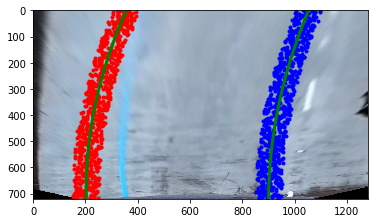

506.001456154 m 574.819615351 m


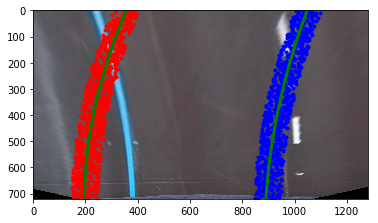

572.395592479 m 770.252949495 m


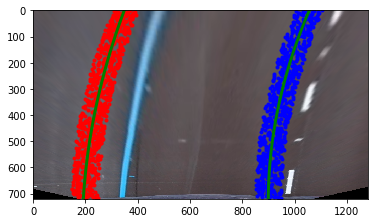

760.131081413 m 560.378256562 m


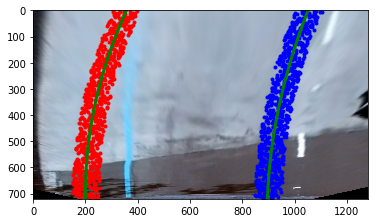

503.377245396 m 668.563108091 m


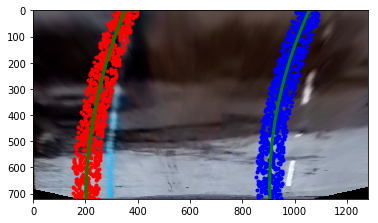

602.204251074 m 486.701095513 m


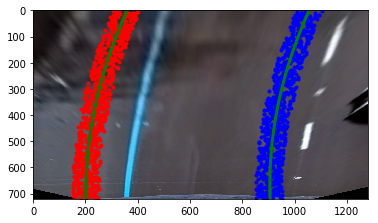

507.089688409 m 483.450473585 m


In [9]:
# Undistort driving images by the above result of camera calibration

pickle.load(open("../camera_cal/dist_pickle.p", "rb"))

# Difine the function for binalizing the images.
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0,255)):
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    #apply threshould
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return binary_output

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    #Calculate gradient magnitude
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    scale_factor = np.max(gradmag)/255
    gradmag = (gradmag/scal_factor).astype(np.uint8)
    binary_output = np.zeros_like(gradmag)
    #Apply threshould
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_tjresh[1])] = 1
    return binary_output

def color_threshould(image, sthresh=(0,255), vthresh=(0,255)):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= sthresh[0]) & (s_channel <= sthresh[1])] == 1
    
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    v_channel = hsv[:,:,2]
    v_binary = np.zeros_like(v_channel)
    v_binary[(v_channel >= vthresh[0]) & (v_channel <= vthresh[1])] == 1
    
    output = np.zeros_like(s_channel)
    output[(s_binary == 1) & (v_binary == 1)] == 1
    return output

#def window_mask(width, height, imag_ref, center, level):
#    output = np.zeros_like(img_ref)
#    output[int(img_ref.shape[0])]
#    return output

# Make a list of calibration images
images = glob.glob('../test_images/test*.jpg')

for index, fname in enumerate(images):
    img = cv2.imread(fname)
    img_size = (img.shape[1], img.shape[0])
    #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    img = cv2.undistort(img, mtx, dist, None, mtx)

    src = np.float32(
    [[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
    [((img_size[0] / 6) - 10), img_size[1]],
    [(img_size[0] * 5 / 6) + 60, img_size[1]],
    [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])

    dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])
    
    #perform the transform
    M = cv2.getPerspectiveTransform(src, dst)

    Minv = cv2.getPerspectiveTransform(dst, src)

    #binary_warped = cv2.warpPerspective(preprocessImage, M, img_size, flags=cv2.INTER_LINEAR)
    binary_warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    # Generate some fake data to represent lane-line pixels
    ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
    quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
    # For each y position generate random x position within +/-50 pix
    # of the line base position in each case (x=200 for left, and x=900 for right)
    leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                              for y in ploty])
    rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                for y in ploty])

    leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
    rightx = rightx[::-1]  # Reverse to match top-to-bottom in y


    # Fit a second order polynomial to pixel positions in each fake lane line
    left_fit = np.polyfit(ploty, leftx, 2)
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fit = np.polyfit(ploty, rightx, 2)
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # Plot up the fake data
    mark_size = 3
    plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
    plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
    plt.xlim(0, 1280)
    plt.ylim(0, 720)
    plt.plot(left_fitx, ploty, color='green', linewidth=3)
    plt.plot(right_fitx, ploty, color='green', linewidth=3)
    plt.gca().invert_yaxis() # to visualize as we do the images
    plt.imshow(binary_warped)
    plt.show()
    
    # Define conversions in x and y from pixels space to meters
    y_eval = np.max(ploty)
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    print(left_curverad, 'm', right_curverad, 'm')
    # Example values: 632.1 m    626.2 m
    
    result = binary_warped
    
    cv2.imwrite('../test_images/transform' + str(index + 1) + '.jpg',result)
    
